In [357]:
import glob
import numpy as np
import pandas as pd
from sklearn.metrics import f1_score, accuracy_score, classification_report
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt

In [358]:
model_to_index = {
    'bloomz-560m': 0,
    'bloomz-1b1': 1,
    'bloomz-1b7': 2,
    'bloomz-3b': 3,
    'bloomz-7b1': 4,
    'mt0-small': 5,
    'mt0-base': 6,
    'mt0-large': 7,
    'mt0-xl': 8,
    'mt0-xxl': 9,
    'bactrian-x-bloom-7b1-lora': 10,
    'bactrian-id-bloom-7b1-lora': 11,
    'Llama-2-13b-chat-hf': 12, 
    'Llama-2-7b-chat-hf': 13,
    'sealion7b-instruct-nc': 14, 
    'SeaLLM-7B-Chat': 15,
    'Merak-7B-v4': 16,
    'cendol-mt5-small': 20,
    'cendol-mt5-base': 21,
    'cendol-mt5-large': 22,
    'cendol-mt5-xl': 23,
    'cendol-mt5-xxl-merged': 24,
    'cendol-llama2-7b': 25,
    'cendol-llama2-13b-merged': 26,
    'cendol-mt5-small-chat': 27,
    'cendol-mt5-base-chat': 28,
    'cendol-mt5-large-chat': 29,
    'cendol-mt5-xl-chat': 30,
    'cendol-mt5-xxl-merged-chat': 31,
    'cendol-llama2-7b-chat': 32,
    'cendol-llama2-13b-merged-chat': 33
}

model_to_display_name = {
    'bloomz-560m': 'BLOOMZ\n560M',
    'bloomz-1b1': 'BLOOMZ\n1.1B',
    'bloomz-1b7': 'BLOOMZ\n1.7B',
    'bloomz-3b': 'BLOOMZ\n3B',
    'bloomz-7b1': 'BLOOMZ\n7.1B',
    'mt0-small': 'mT0\nSmall',
    'mt0-base': 'mT0\nBase',
    'mt0-large': 'mT0\nLarge',
    'mt0-xl': 'mT0\nXL',
    'mt0-xxl': 'mT0\nXXL',
    'bactrian-x-bloom-7b1-lora': 'Bactrian\n-X',
    'bactrian-id-bloom-7b1-lora': 'Bactrian\n-Id',
    'Llama-2-7b-chat-hf': 'LLaMA2\n7B Chat', 
    'Llama-2-13b-chat-hf': 'LLaMA2\n13B Chat', 
    'sealion7b-instruct-nc': 'SEALION\n7B Instruct', 
    'SeaLLM-7B-Chat': 'SeaLLM\n7B Chat',
    'Merak-7B-v4': 'Merak\n7B v4',
    'cendol-mt5-small': 'Cendol\nmT5 Small',
    'cendol-mt5-base': 'Cendol\nmT5 Base',
    'cendol-mt5-large': 'Cendol\nmT5 Large',
    'cendol-mt5-xl': 'Cendol\nmT5 XL',
    'cendol-mt5-xxl-merged': 'Cendol\nmT5 XXL',
    'cendol-llama2-7b': 'Cendol\nLLaMA2 7B',
    'cendol-llama2-13b-merged': 'Cendol\nLLaMA2 13B',
    'cendol-mt5-small-chat': 'Cendol mT5\nSmall Chat',
    'cendol-mt5-base-chat': 'Cendol mT5\nBase Chat',
    'cendol-mt5-large-chat': 'Cendol mT5\nLarge Chat',
    'cendol-mt5-xl-chat': 'Cendol mT5\nXL Chat',
    'cendol-mt5-xxl-merged-chat': 'Cendol mT5\nXXL Chat',
    'cendol-llama2-7b-chat': 'Cendol LLaMA2\n7B Chat',
    'cendol-llama2-13b-merged-chat':'Cendol LLaMA2\n13B Chat'
}

# model_to_color = {
#     'bloomz-560m': 'gray',
#     'bloomz-1b1': 'gray',
#     'bloomz-1b7': 'gray',
#     'bloomz-3b': 'gray',
#     'bloomz-7b1': 'gray',
#     'mt0-small': 'g',
#     'mt0-base': 'g',
#     'mt0-large': 'g',
#     'mt0-xl': 'g',
#     'mt0-xxl': 'g',
#     'bactrian-x-bloom-7b1-lora': 'b',
#     'bactrian-id-bloom-7b1-lora': 'b',
#     'Llama-2-13b-chat-hf': 'purple', 
#     'Llama-2-7b-chat-hf': 'purple', 
#     'sealion7b-instruct-nc': 'orange',
#     'SeaLLM-7B-Chat': 'orange',
#     'Merak-7B-v4': 'yellow',
#     'cendol-mt5-small': 'r',
#     'cendol-mt5-base': 'r',
#     'cendol-mt5-large': 'r',
#     'cendol-mt5-xl': 'r',
#     'cendol-mt5-xxl-merged': 'r',
#     'cendol-llama2-7b': 'pink',
#     'cendol-llama2-13b-merged': 'pink',
#     'cendol-mt5-small-chat': 'r',
#     'cendol-mt5-base-chat': 'r',
#     'cendol-mt5-large-chat': 'r',
#     'cendol-mt5-xl-chat': 'r',
#     'cendol-mt5-xxl-merged-chat': 'r',
#     'cendol-llama2-7b-chat': 'pink',
#     'cendol-llama2-13b-merged-chat': 'pink'
# }

model_to_color = {
    'bloomz-560m': '#fe88b1',
    'bloomz-1b1': '#fe88b1',
    'bloomz-1b7': '#fe88b1',
    'bloomz-3b': '#fe88b1',
    'bloomz-7b1': '#fe88b1',
    'mt0-small': '#ffd557',
    'mt0-base': '#ffd557',
    'mt0-large': '#ffd557',
    'mt0-xl': '#ffd557',
    'mt0-xxl': '#ffd557',
    'bactrian-x-bloom-7b1-lora': '#2f8bc4',
    'bactrian-id-bloom-7b1-lora': '#2f8bc4',
    'Llama-2-13b-chat-hf': '#fe6f02', 
    'Llama-2-7b-chat-hf': '#fe6f02', 
    'sealion7b-instruct-nc': '#764e9f',
    'SeaLLM-7B-Chat': '#764e9f',
    'Merak-7B-v4': '#cc3134',
    'cendol-mt5-small': '#7bfa20',
    'cendol-mt5-base': '#7bfa20',
    'cendol-mt5-large': '#7bfa20',
    'cendol-mt5-xl': '#7bfa20',
    'cendol-mt5-xxl-merged': '#7bfa20',
    'cendol-llama2-7b': '#02ab39',
    'cendol-llama2-13b-merged': '#02ab39',
    'cendol-mt5-small-chat': '#73af48',
    'cendol-mt5-base-chat': '#73af48',
    'cendol-mt5-large-chat': '#73af48',
    'cendol-mt5-xl-chat': '#73af48',
    'cendol-mt5-xxl-merged-chat': '#73af48',
    'cendol-llama2-7b-chat': '#117733',
    'cendol-llama2-13b-merged-chat': '#117733'
}

In [359]:
dfs = []
for path in glob.glob('metrics_nlu/*.csv'):
    model = path[:-4].split('_')[-1]
    if model == 'sealion7b':
        continue
        
    lang = path.split('results')[1].split('_')[1]
    df = pd.read_csv(path).set_index('index')
    df['accuracy'] = df['accuracy'].astype(float) * 100
    df['macro_f1_score'] = df['macro_f1_score'].astype(float) * 100
    df['weighted_f1_score'] = df['weighted_f1_score'].astype(float) * 100
    df['model'] = model
    df['lang'] = lang
    dfs.append(df)
df = pd.concat(dfs)

In [360]:
df.shape, df.dropna().shape

((4350, 15), (4350, 15))

In [361]:
df.model.unique()

array(['bloomz-7b1', 'cendol-llama2-13b-merged', 'cendol-mt5-large',
       'bloomz-1b7', 'Llama-2-7b-chat-hf', 'cendol-mt5-small-chat',
       'bloomz-560m', 'mt0-xxl', 'SeaLLM-7B-Chat', 'bloomz-1b1',
       'cendol-mt5-base', 'cendol-llama2-7b', 'cendol-mt5-small',
       'bloomz-3b', 'mt0-large', 'cendol-mt5-xxl-merged-chat',
       'bactrian-id-bloom-7b1-lora', 'mt0-base', 'mt0-small',
       'cendol-mt5-base-chat', 'mt0-xl', 'Llama-2-13b-chat-hf',
       'cendol-mt5-xl-chat', 'cendol-mt5-xxl-merged',
       'cendol-mt5-large-chat', 'sealion7b-instruct-nc', 'Merak-7B-v4',
       'cendol-mt5-xl', 'bactrian-x-bloom-7b1-lora'], dtype=object)

### Check Per Dataset

In [362]:
df = df.dropna()

In [363]:
df[(df['lang'] == 'ind')].groupby(['model', 'lang'])[['accuracy', 'macro_f1_score', 'weighted_f1_score']].mean().sort_values(['model','weighted_f1_score'])

,,accuracy,macro_f1_score,weighted_f1_score
model,lang,,,
Llama-2-13b-chat-hf,ind,36.869093,28.608506,33.777562
Llama-2-7b-chat-hf,ind,36.450504,28.741931,34.584017
Merak-7B-v4,ind,53.572958,40.146273,49.769052
SeaLLM-7B-Chat,ind,42.029900,32.983194,39.122928
bactrian-id-bloom-7b1-lora,ind,41.409601,29.576753,37.012212
bactrian-x-bloom-7b1-lora,ind,45.222452,32.143358,41.029785
bloomz-1b1,ind,38.745216,28.940960,34.358121
bloomz-1b7,ind,34.224181,23.491256,27.886901
bloomz-3b,ind,38.560578,30.572126,35.559794


In [364]:
df[(df['lang'] == 'eng')].groupby(['model', 'lang'])[['accuracy', 'macro_f1_score', 'weighted_f1_score']].mean().sort_values(['model','weighted_f1_score'])

,,accuracy,macro_f1_score,weighted_f1_score
model,lang,,,
Llama-2-13b-chat-hf,eng,42.188618,31.392372,37.717018
Llama-2-7b-chat-hf,eng,39.221828,27.653062,33.190314
Merak-7B-v4,eng,51.497571,36.750932,46.130300
SeaLLM-7B-Chat,eng,40.817008,32.327304,37.037792
bactrian-id-bloom-7b1-lora,eng,40.747443,24.936398,31.711495
bactrian-x-bloom-7b1-lora,eng,40.943970,26.749481,34.046845
bloomz-1b1,eng,41.597140,32.457577,37.637911
bloomz-1b7,eng,45.757402,33.190976,40.519028
bloomz-3b,eng,46.445115,36.303730,44.337701


In [365]:
df[(df['lang'] == 'ind')].groupby(['model', 'lang'])[['accuracy', 'macro_f1_score', 'weighted_f1_score']].mean().sort_values(['model','weighted_f1_score'])

,,accuracy,macro_f1_score,weighted_f1_score
model,lang,,,
Llama-2-13b-chat-hf,ind,36.869093,28.608506,33.777562
Llama-2-7b-chat-hf,ind,36.450504,28.741931,34.584017
Merak-7B-v4,ind,53.572958,40.146273,49.769052
SeaLLM-7B-Chat,ind,42.029900,32.983194,39.122928
bactrian-id-bloom-7b1-lora,ind,41.409601,29.576753,37.012212
bactrian-x-bloom-7b1-lora,ind,45.222452,32.143358,41.029785
bloomz-1b1,ind,38.745216,28.940960,34.358121
bloomz-1b7,ind,34.224181,23.491256,27.886901
bloomz-3b,ind,38.560578,30.572126,35.559794


In [366]:
df[(df['lang'] == 'eng')].groupby(['model', 'lang'])[['macro_f1_score','macro_f1_score', 'weighted_f1_score']].mean().sort_values(['model','weighted_f1_score'])

,,macro_f1_score,macro_f1_score,weighted_f1_score
model,lang,,,
Llama-2-13b-chat-hf,eng,31.392372,31.392372,37.717018
Llama-2-7b-chat-hf,eng,27.653062,27.653062,33.190314
Merak-7B-v4,eng,36.750932,36.750932,46.130300
SeaLLM-7B-Chat,eng,32.327304,32.327304,37.037792
bactrian-id-bloom-7b1-lora,eng,24.936398,24.936398,31.711495
bactrian-x-bloom-7b1-lora,eng,26.749481,26.749481,34.046845
bloomz-1b1,eng,32.457577,32.457577,37.637911
bloomz-1b7,eng,33.190976,33.190976,40.519028
bloomz-3b,eng,36.303730,36.303730,44.337701


In [367]:
df.model.unique()

array(['bloomz-7b1', 'cendol-llama2-13b-merged', 'cendol-mt5-large',
       'bloomz-1b7', 'Llama-2-7b-chat-hf', 'cendol-mt5-small-chat',
       'bloomz-560m', 'mt0-xxl', 'SeaLLM-7B-Chat', 'bloomz-1b1',
       'cendol-mt5-base', 'cendol-llama2-7b', 'cendol-mt5-small',
       'bloomz-3b', 'mt0-large', 'cendol-mt5-xxl-merged-chat',
       'bactrian-id-bloom-7b1-lora', 'mt0-base', 'mt0-small',
       'cendol-mt5-base-chat', 'mt0-xl', 'Llama-2-13b-chat-hf',
       'cendol-mt5-xl-chat', 'cendol-mt5-xxl-merged',
       'cendol-mt5-large-chat', 'sealion7b-instruct-nc', 'Merak-7B-v4',
       'cendol-mt5-xl', 'bactrian-x-bloom-7b1-lora'], dtype=object)

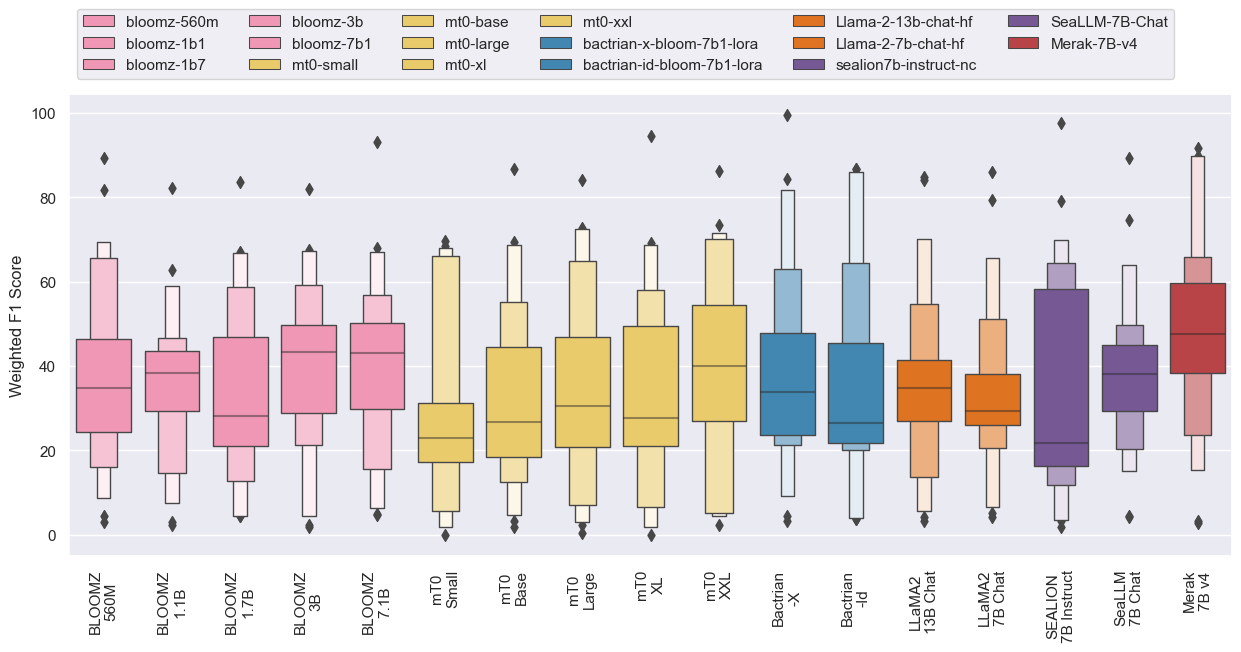

In [368]:
sns.set(rc={'figure.figsize':(15,6)})


pdf = df.groupby(['dataset', 'model', 'lang'])[['accuracy','macro_f1_score','weighted_f1_score']].mean().reset_index()
pdf = pdf.loc[~pdf['model'].str.contains('cendol'),:]
pdf['model_id'] = pdf['model'].apply(lambda x: model_to_index[x])
pdf['model_name'] = pdf['model'].apply(lambda x: model_to_display_name[x])
pdf = pdf.sort_values('model_id')
sns.boxenplot(data=pdf, x='model_name', y='weighted_f1_score', hue='model', k_depth=3, dodge=False, palette=model_to_color.values())
# sns.stripplot(pdf[pdf['lang'] == 'ind'].sort_values('model_id'), x='model', y='weighted_f1_score', hue='model', legend=False, alpha=.8)
plt.legend(loc='upper left', bbox_to_anchor=(0, 1.2), ncols=6)
plt.xticks(rotation=90)
plt.ylabel('Weighted F1 Score')
plt.xlabel(None)
plt.savefig('./figures/weighted_f1_score_baseline.pdf', bbox_inches='tight')
plt.show()

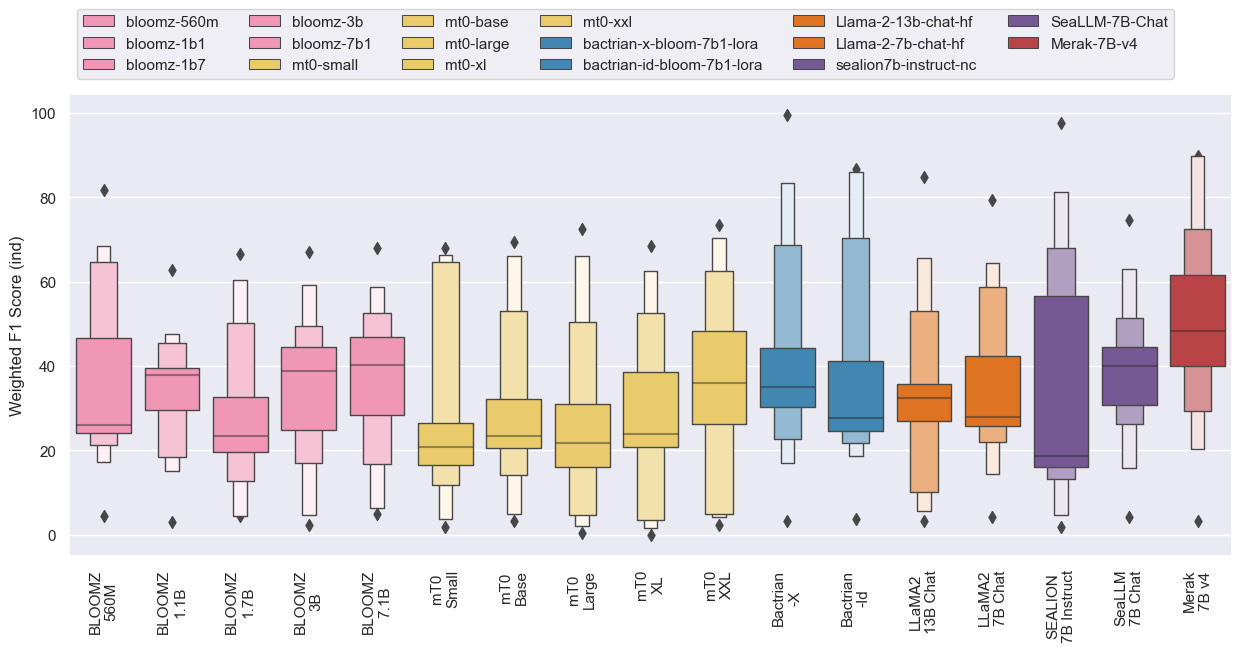

In [369]:
sns.set(rc={'figure.figsize':(15,6)})


pdf = df.groupby(['dataset', 'model', 'lang'])[['accuracy','macro_f1_score','weighted_f1_score']].mean().reset_index()
pdf = pdf.loc[~pdf['model'].str.contains('cendol'),:]
pdf['model_id'] = pdf['model'].apply(lambda x: model_to_index[x])
pdf['model_name'] = pdf['model'].apply(lambda x: model_to_display_name[x])
pdf = pdf[pdf['lang'] == 'ind'].sort_values('model_id')
sns.boxenplot(data=pdf, x='model_name', y='weighted_f1_score', hue='model', k_depth=3, dodge=False, palette=model_to_color.values())
# sns.stripplot(pdf[pdf['lang'] == 'ind'].sort_values('model_id'), x='model', y='weighted_f1_score', hue='model', legend=False, alpha=.8)
plt.legend(loc='upper left', bbox_to_anchor=(0, 1.2), ncols=6)
plt.xticks(rotation=90)
plt.ylabel('Weighted F1 Score (ind)')
plt.xlabel(None)
plt.savefig('./figures/weighted_f1_score_ind_baseline.pdf', bbox_inches='tight')
plt.show()

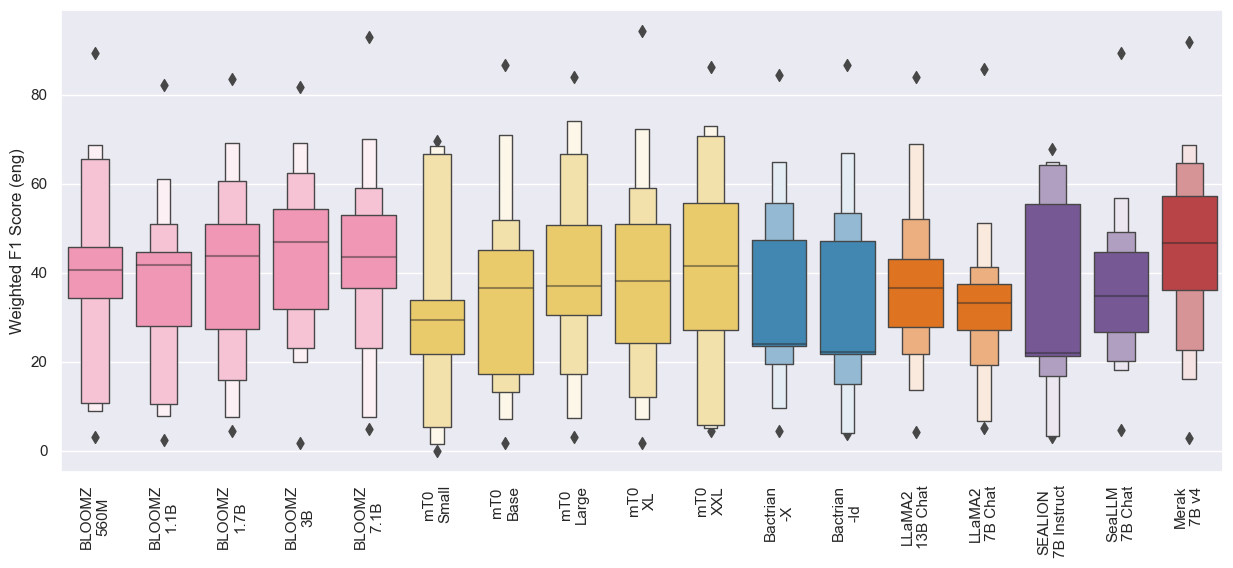

In [370]:
sns.set(rc={'figure.figsize':(15,6)})

pdf = df.groupby(['dataset', 'model', 'lang'])[['accuracy','macro_f1_score','weighted_f1_score']].mean().reset_index()
pdf = pdf[~pdf['model'].str.contains('cendol')]
pdf['model_id'] = pdf['model'].apply(lambda x: model_to_index[x])
pdf['model_name'] = pdf['model'].apply(lambda x: model_to_display_name[x])
pdf = pdf[pdf['lang'] == 'eng'].sort_values('model_id')
ax= sns.boxenplot(data=pdf, x='model_name', y='weighted_f1_score', hue='model', k_depth=3, dodge=False, palette=model_to_color.values())
# sns.stripplot(pdf[pdf['lang'] == 'eng'].sort_values('model_id'), x='model', y='weighted_f1_score', hue='model', legend=False, alpha=.8)
# plt.legend(loc='upper left', bbox_to_anchor=(0, 1.15), ncols=6)
ax.get_legend().set_visible(False)
plt.xticks(rotation=90)
plt.ylabel('Weighted F1 Score (eng)')
plt.xlabel(None)
plt.savefig('./figures/weighted_f1_score_eng_baseline.pdf', bbox_inches='tight')
plt.show()

# NLU SCORE OVERALL

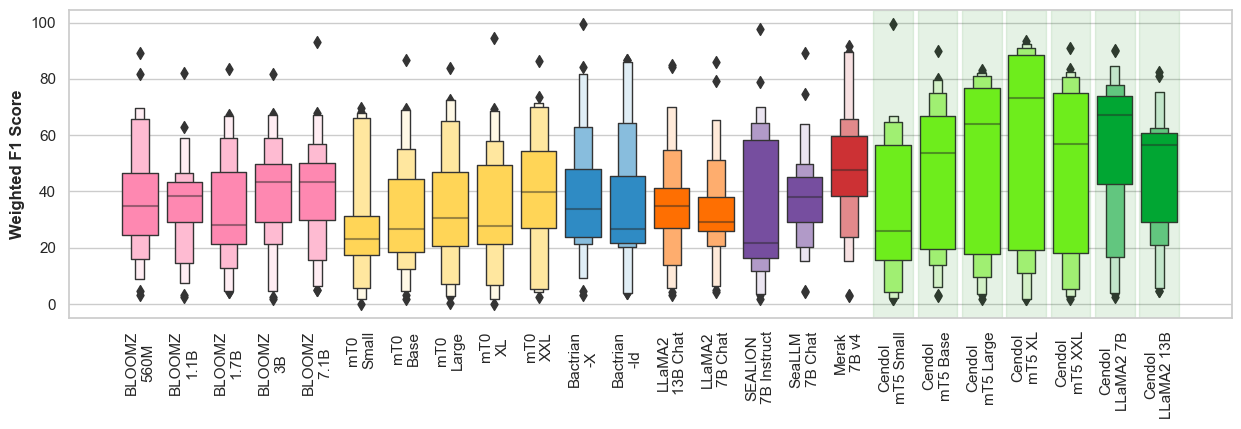

In [371]:
# With Cendol
sns.set(rc={'figure.figsize':(15,4)})

sns.set_theme(style="whitegrid", palette=None)

pdf = df.groupby(['dataset', 'model', 'lang'])[['accuracy','macro_f1_score','weighted_f1_score']].mean().reset_index()
# pdf = pdf.loc[~pdf['model'].str.contains('cendol'),:]
pdf['model_id'] = pdf['model'].apply(lambda x: model_to_index[x])
pdf['model_name'] = pdf['model'].apply(lambda x: model_to_display_name[x])
pdf = pdf[(~pdf['model'].str.contains('chat')) | (~pdf['model'].str.contains('cendol'))]
pdf = pdf.sort_values('model_id')
ax = sns.boxenplot(data=(pdf), x='model_name', y='weighted_f1_score',
                   hue='model', k_depth=3, dodge=False, palette=model_to_color.values(),
                   saturation=1,
                   linewidth=0.8,
)
# sns.stripplot(pdf[pdf['lang'] == 'ind'].sort_values('model_id'), x='model', y='weighted_f1_score', hue='model', legend=False, alpha=.8)
# plt.legend(loc='upper left', bbox_to_anchor=(0, 1.2), ncols=6)
n_model = len(pdf["model_name"].unique())
for i in range(n_model-7, n_model):
    ax.axvspan(i-0.45,i+0.45, color='green', alpha=0.1)
ax.get_legend().set_visible(False)
plt.xticks(rotation=90)
plt.ylabel('Weighted F1 Score', fontdict={'weight': 'bold'})
plt.xlabel(None)
plt.savefig('./figures/weighted_f1_score.pdf', bbox_inches='tight')
plt.show()

In [226]:
model_to_color

{'bloomz-560m': '#fe88b1',
 'bloomz-1b1': '#fe88b1',
 'bloomz-1b7': '#fe88b1',
 'bloomz-3b': '#fe88b1',
 'bloomz-7b1': '#fe88b1',
 'mt0-small': '#ffd557',
 'mt0-base': '#ffd557',
 'mt0-large': '#ffd557',
 'mt0-xl': '#ffd557',
 'mt0-xxl': '#ffd557',
 'bactrian-x-bloom-7b1-lora': '#2f8bc4',
 'bactrian-id-bloom-7b1-lora': '#2f8bc4',
 'Llama-2-13b-chat-hf': '#fe6f02',
 'Llama-2-7b-chat-hf': '#fe6f02',
 'sealion7b-instruct-nc': '#764e9f',
 'SeaLLM-7B-Chat': '#764e9f',
 'Merak-7B-v4': '#cc3134',
 'cendol-mt5-small': '#7bfa20',
 'cendol-mt5-base': '#7bfa20',
 'cendol-mt5-large': '#7bfa20',
 'cendol-mt5-xl': '#7bfa20',
 'cendol-mt5-xxl-merged': '#7bfa20',
 'cendol-llama2-7b': '#02ab39',
 'cendol-llama2-13b-merged': '#02ab39',
 'cendol-mt5-small-chat': '#73af48',
 'cendol-mt5-base-chat': '#73af48',
 'cendol-mt5-large-chat': '#73af48',
 'cendol-mt5-xl-chat': '#73af48',
 'cendol-mt5-xxl-merged-chat': '#73af48',
 'cendol-llama2-7b-chat': '#117733',
 'cendol-llama2-13b-merged-chat': '#117733'}

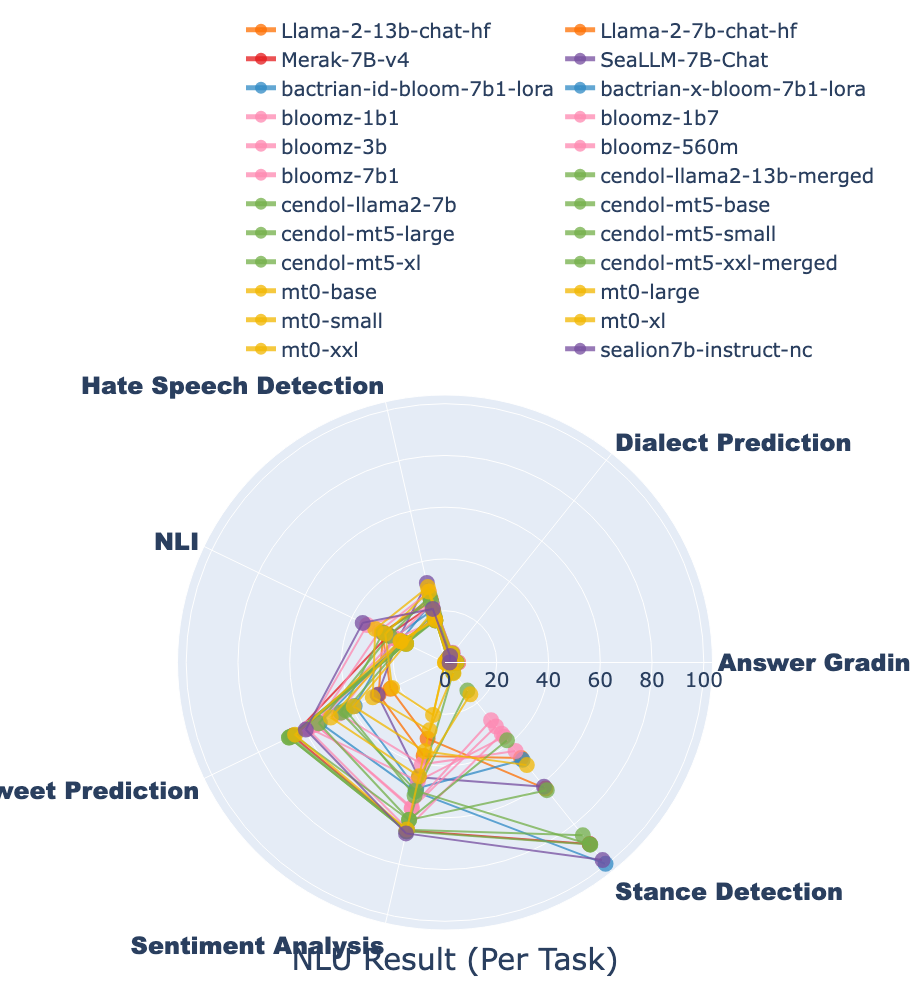

In [227]:
import plotly.graph_objects as go

DATASET_TO_TASK_MAPPING = {
    "code_mixed_jv_id_jv_nusantara_text": "Sentiment Analysis",
    "id_google_play_review_nusantara_text": "Sentiment Analysis",
    "id_google_play_review_posneg_nusantara_text": "Sentiment Analysis",
    "id_hsd_nofaaulia_nusantara_text": "Hate Speech Detection",
    "id_short_answer_grading_nusantara_pairs_score": "Answer Grading",
    "id_stance_nusantara_pairs": "Stance Detection",
    "indolem_ntp_nusantara_pairs": "Next Tweet Prediction",
    "jadi_ide_nusantara_text": "Dialect Prediction",
    "nusax_senti_ace_nusantara_text": "Sentiment Analysis",
    "nusax_senti_ban_nusantara_text": "Sentiment Analysis",
    "nusax_senti_bjn_nusantara_text": "Sentiment Analysis",
    "nusax_senti_bug_nusantara_text": "Sentiment Analysis",
    "nusax_senti_mad_nusantara_text": "Sentiment Analysis",
    "nusax_senti_nij_nusantara_text": "Sentiment Analysis",
    "wrete_nusantara_pairs": "NLI"
}

MODEL_TO_COLOR_MAPPING = {
    'Llama-2-13b-chat-hf': 'rgba(254, 111, 2, 0.75)',
    'Llama-2-7b-chat-hf': 'rgba(254, 111, 2, 0.75)',
    'Merak-7B-v4': 'rgba(228, 26, 28, 0.75)',
    'SeaLLM-7B-Chat': 'rgba(118, 78, 159, 0.75)',
    'bactrian-id-bloom-7b1-lora': 'rgba(47, 138, 196, 0.75)',
    'bactrian-x-bloom-7b1-lora': 'rgba(47, 138, 196, 0.75)',
    'bloomz-1b1': 'rgba(254, 136, 177, 0.75)',
    'bloomz-1b7': 'rgba(254, 136, 177, 0.75)',
    'bloomz-3b': 'rgba(254, 136, 177, 0.75)',
    'bloomz-560m': 'rgba(254, 136, 177, 0.75)',
    'bloomz-7b1': 'rgba(254, 136, 177, 0.75)',
    'cendol-llama2-13b-merged': 'rgba(115, 175, 72, 0.75)',
    'cendol-llama2-7b': 'rgba(115, 175, 72, 0.75)',
    'cendol-mt5-base': 'rgba(115, 175, 72, 0.75)',
    'cendol-mt5-large': 'rgba(115, 175, 72, 0.75)',
    'cendol-mt5-small': 'rgba(115, 175, 72, 0.75)',
    'cendol-mt5-xl': 'rgba(115, 175, 72, 0.75)',
    'cendol-mt5-xxl-merged': 'rgba(115, 175, 72, 0.75)',
    'mt0-base': 'rgba(242, 183, 1, 0.75)',
    'mt0-large': 'rgba(242, 183, 1, 0.75)',
    'mt0-small': 'rgba(242, 183, 1, 0.75)',
    'mt0-xl': 'rgba(242, 183, 1, 0.75)',
    'mt0-xxl': 'rgba(242, 183, 1, 0.75)',
    'sealion7b-instruct-nc': 'rgba(118, 78, 159, 0.75)',
}

MODEL_TO_MODELFAM_MAPPING = {
    'Llama-2-13b-chat-hf': 'Llama2 Chat',
    'Llama-2-7b-chat-hf': 'Llama2 Chat',
    'Merak-7B-v4': 'Indonesian LLM',
    'SeaLLM-7B-Chat': 'SEA LLM',
    'bactrian-id-bloom-7b1-lora': 'Bactrian',
    'bactrian-x-bloom-7b1-lora': 'Bactrian',
    'bloomz-1b1': 'BLOOMZ',
    'bloomz-1b7': 'BLOOMZ',
    'bloomz-3b': 'BLOOMZ',
    'bloomz-560m': 'BLOOMZ',
    'bloomz-7b1': 'BLOOMZ',
    'cendol-llama2-13b-merged': 'Cendol',
    'cendol-llama2-7b': 'Cendol',
    'cendol-mt5-base': 'Cendol',
    'cendol-mt5-large': 'Cendol',
    'cendol-mt5-small': 'Cendol',
    'cendol-mt5-xl': 'Cendol',
    'cendol-mt5-xxl-merged': 'Cendol',
    'mt0-base': 'mT0',
    'mt0-large': 'mT0',
    'mt0-small': 'mT0',
    'mt0-xl': 'mT0',
    'mt0-xxl': 'mT0',
    'sealion7b-instruct-nc': 'SEA LLM',
}

# pdf["task"] = [DATASET_TO_TASK_MAPPING[pdf["dataset"][i]] for i in range(len(pdf))]
tasks = []
for i in range(len(pdf)):
    dataset = pdf.iloc[i]["dataset"]
    tasks += [DATASET_TO_TASK_MAPPING[dataset]]
pdf["task"] = tasks

pdf = pdf.sort_values(['task', 'model'])
categories = pdf["task"].unique()

fig = go.Figure()

for model in pdf["model"].unique():
    fig.add_trace(go.Scatterpolar(
        r=pdf[pdf["model"] == model]["weighted_f1_score"],
        theta=categories,
        fill='toself',
        fillcolor="rgba(60, 59, 95, 0)",
        line_color=MODEL_TO_COLOR_MAPPING[model],
        marker=dict(symbol="circle-dot"),
        name=model,
    ))

fig.update_traces(mode = "lines+markers",
    marker = dict(
        size = 16
    ))

fig.update_layout(
  polar=dict(
      radialaxis_tickfont_size = 20,
    radialaxis=dict(
      visible=True,
      # range=[0.75, 0.95],
       # tickformat = '.0000%'
    ), angularaxis = dict(
        tickfont_size=24, tickfont_family="Arial Black",
        rotation=0, # start position of angular axis
        # direction="counterclockwise"
      )),
    legend=dict(
        font=dict(size=20),
        orientation="h",
        yanchor="bottom",
        y=1.05,
        xanchor="right",
        x=1,
        title="",
        itemsizing="constant",
    ),
    margin=dict(l=10, r=30, t=70, b=70),
    height=1000, width=1000, title_text="NLU Result (Per Task)", title_font_size=30,
    title_xanchor='center', title_yanchor="bottom", title_x=0.5, title_y=0.03
)

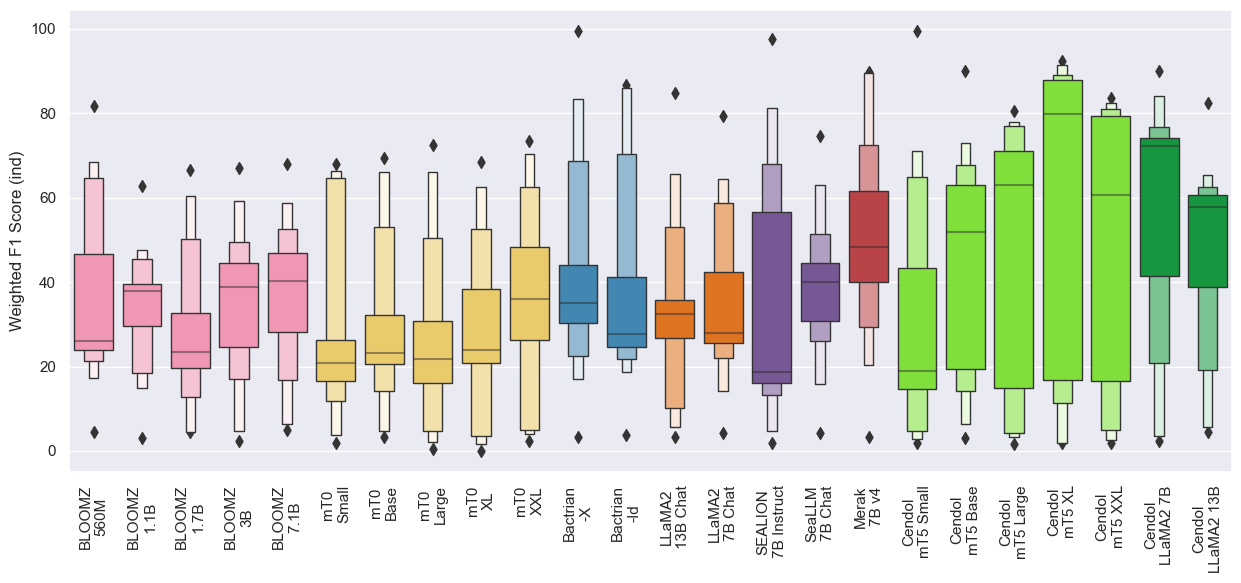

In [228]:
# With Cendol
sns.set(rc={'figure.figsize':(15,6)})


pdf = df.groupby(['dataset', 'model', 'lang'])[['accuracy','macro_f1_score','weighted_f1_score']].mean().reset_index()
# pdf = pdf.loc[~pdf['model'].str.contains('cendol'),:]
pdf['model_id'] = pdf['model'].apply(lambda x: model_to_index[x])
pdf['model_name'] = pdf['model'].apply(lambda x: model_to_display_name[x])
pdf = pdf[(~pdf['model'].str.contains('chat')) | (~pdf['model'].str.contains('cendol'))]
pdf = pdf[pdf['lang'] == 'ind'].sort_values('model_id')
ax = sns.boxenplot(data=pdf, x='model_name', y='weighted_f1_score', hue='model', k_depth=3, dodge=False, palette=model_to_color.values())
# sns.stripplot(pdf[pdf['lang'] == 'ind'].sort_values('model_id'), x='model', y='weighted_f1_score', hue='model', legend=False, alpha=.8)
# plt.legend(loc='upper left', bbox_to_anchor=(0, 1.2), ncols=6)
ax.get_legend().set_visible(False)
plt.xticks(rotation=90)
plt.ylabel('Weighted F1 Score (ind)')
plt.xlabel(None)
plt.savefig('./figures/weighted_f1_score_ind.pdf', bbox_inches='tight')
plt.show()

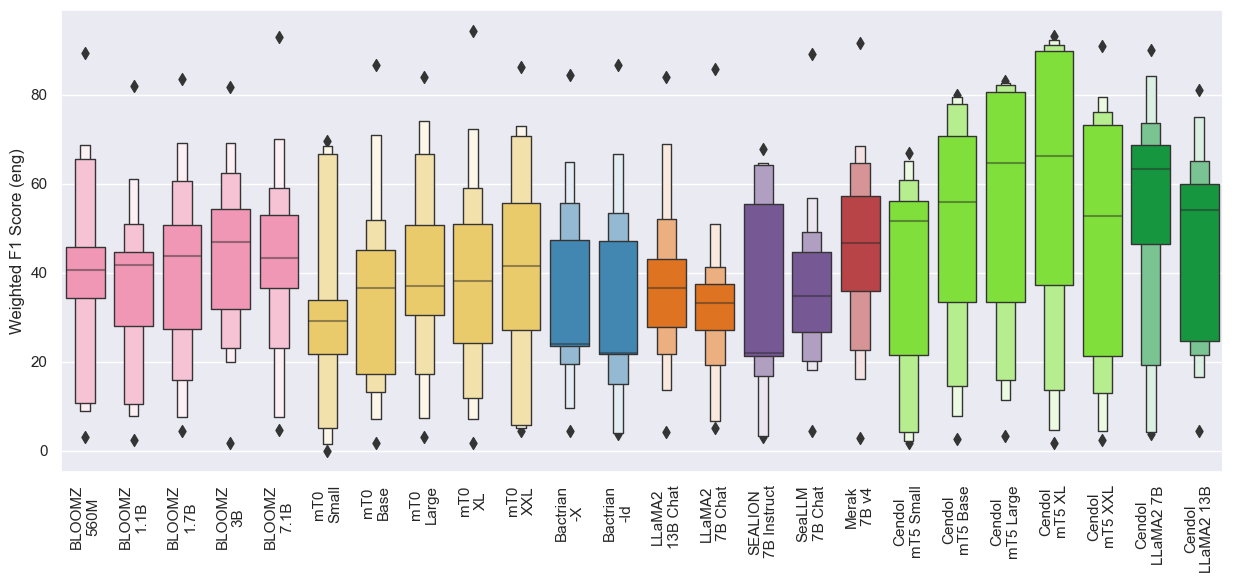

In [229]:
# With Cendol
sns.set(rc={'figure.figsize':(15,6)})

pdf = df.groupby(['dataset', 'model', 'lang'])[['accuracy','macro_f1_score','weighted_f1_score']].mean().reset_index()
# pdf = pdf.loc[~pdf['model'].str.contains('cendol'),:]
pdf['model_id'] = pdf['model'].apply(lambda x: model_to_index[x])
pdf['model_name'] = pdf['model'].apply(lambda x: model_to_display_name[x])
pdf = pdf[(~pdf['model'].str.contains('chat')) | (~pdf['model'].str.contains('cendol'))]
pdf = pdf[pdf['lang'] == 'eng'].sort_values('model_id')
ax = sns.boxenplot(data=pdf, x='model_name', y='weighted_f1_score', hue='model', k_depth=3, dodge=False, palette=model_to_color.values())
# sns.stripplot(pdf[pdf['lang'] == 'eng'].sort_values('model_id'), x='model', y='weighted_f1_score', hue='model', legend=False, alpha=.8)
# plt.legend(loc='upper left', bbox_to_anchor=(0, 1.15), ncols=6)
ax.get_legend().set_visible(False)
plt.xticks(rotation=90)
plt.ylabel('Weighted F1 Score (eng)')
plt.xlabel(None)
plt.savefig('./figures/weighted_f1_score_eng.pdf', bbox_inches='tight')
plt.show()

# Other Metrics

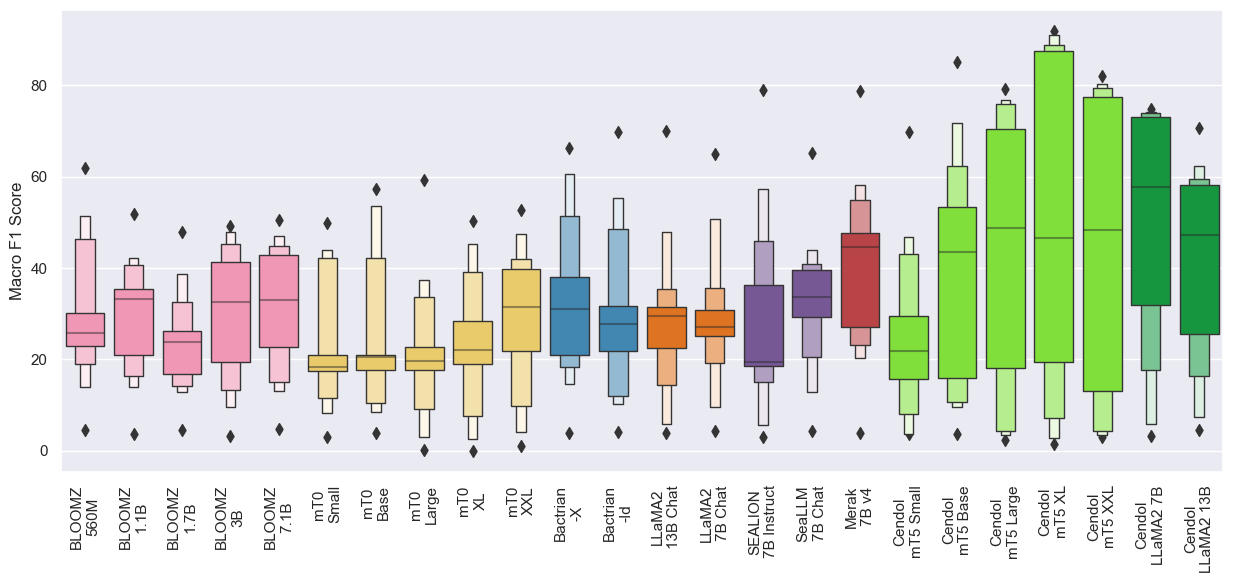

In [230]:
sns.set(rc={'figure.figsize':(15,6)})

pdf = df.groupby(['dataset', 'model', 'lang'])[['accuracy','micro_f1_score','macro_f1_score','weighted_f1_score']].mean().reset_index()
pdf = pdf[(~pdf['model'].str.contains('chat')) | (~pdf['model'].str.contains('cendol'))]
pdf['model_id'] = pdf['model'].apply(lambda x: model_to_index[x])
pdf['model_name'] = pdf['model'].apply(lambda x: model_to_display_name[x])
# sns.boxplot(pdf[pdf['lang'] == 'ind'].sort_values('model_id'), x='model', y='macro_f1_score', hue='model', dodge=False)
pdf = pdf[pdf['lang'] == 'ind'].sort_values('model_id')
ax = sns.boxenplot(data=pdf, x='model_name', y='macro_f1_score', hue='model', k_depth=3, dodge=False, palette=model_to_color.values())
# sns.stripplot(pdf[pdf['lang'] == 'ind'].sort_values('model_id'), x='model', y='weighted_f1_score', hue='model', legend=False, alpha=.8)
# plt.legend(loc='upper left', bbox_to_anchor=(0, 1.2), ncols=6)
ax.get_legend().set_visible(False)
plt.xticks(rotation=90)
plt.ylabel('Macro F1 Score')
plt.xlabel(None)
plt.savefig('./figures/macro_f1_score.pdf', bbox_inches='tight')
plt.show()

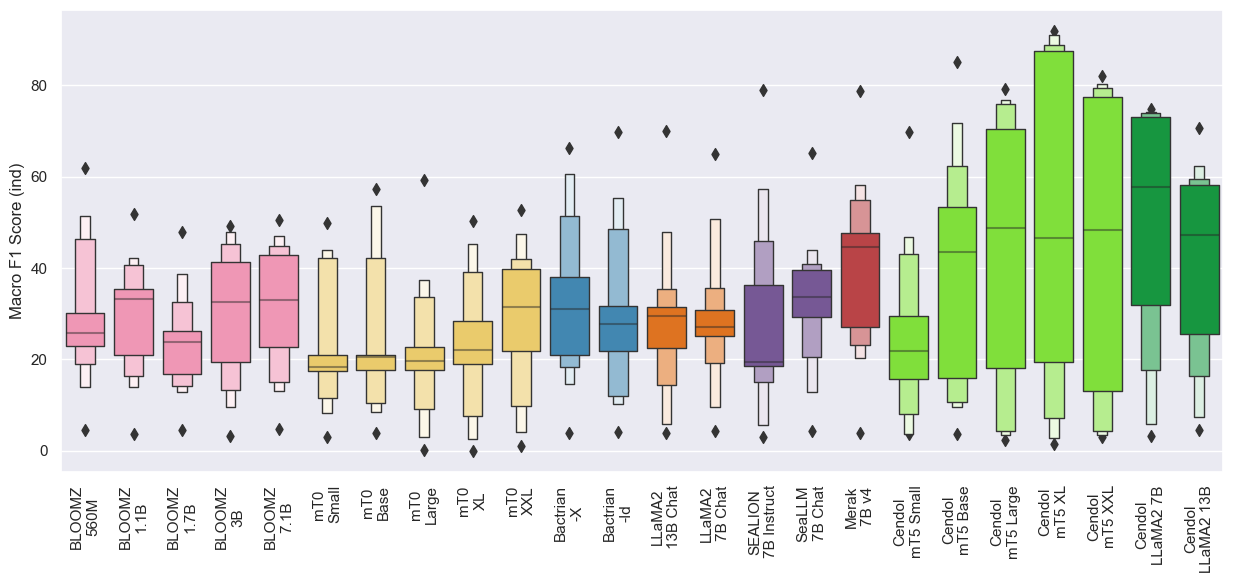

In [231]:
sns.set(rc={'figure.figsize':(15,6)})

pdf = df.groupby(['dataset', 'model', 'lang'])[['accuracy','micro_f1_score','macro_f1_score','weighted_f1_score']].mean().reset_index()
pdf = pdf[(~pdf['model'].str.contains('chat')) | (~pdf['model'].str.contains('cendol'))]
pdf['model_id'] = pdf['model'].apply(lambda x: model_to_index[x])
pdf['model_name'] = pdf['model'].apply(lambda x: model_to_display_name[x])
# sns.boxplot(pdf[pdf['lang'] == 'ind'].sort_values('model_id'), x='model', y='macro_f1_score', hue='model', dodge=False)
pdf = pdf[pdf['lang'] == 'ind'].sort_values('model_id')
ax = sns.boxenplot(data=pdf, x='model_name', y='macro_f1_score', hue='model', k_depth=3, dodge=False, palette=model_to_color.values())
# sns.stripplot(pdf[pdf['lang'] == 'ind'].sort_values('model_id'), x='model', y='weighted_f1_score', hue='model', legend=False, alpha=.8)
# plt.legend(loc='upper left', bbox_to_anchor=(0, 1.2), ncols=6)
ax.get_legend().set_visible(False)
plt.xticks(rotation=90)
plt.ylabel('Macro F1 Score (ind)')
plt.xlabel(None)
plt.savefig('./figures/macro_f1_score_ind.pdf', bbox_inches='tight')
plt.show()

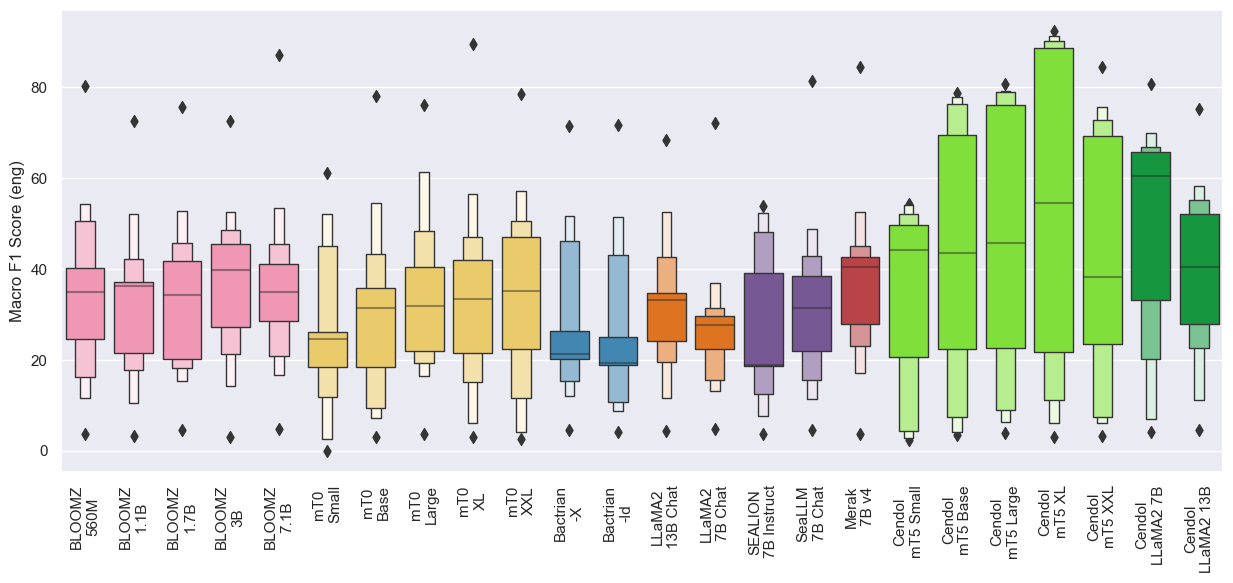

In [232]:
sns.set(rc={'figure.figsize':(15,6)})

pdf = df.groupby(['dataset', 'model', 'lang'])[['accuracy','micro_f1_score','macro_f1_score','weighted_f1_score']].mean().reset_index()
pdf = pdf[(~pdf['model'].str.contains('chat')) | (~pdf['model'].str.contains('cendol'))]
pdf['model_id'] = pdf['model'].apply(lambda x: model_to_index[x])
pdf['model_name'] = pdf['model'].apply(lambda x: model_to_display_name[x])
# sns.boxplot(pdf[pdf['lang'] == 'ind'].sort_values('model_id'), x='model', y='macro_f1_score', hue='model', dodge=False)
pdf = pdf[pdf['lang'] == 'eng'].sort_values('model_id')
ax = sns.boxenplot(data=pdf, x='model_name', y='macro_f1_score', hue='model', k_depth=3, dodge=False, palette=model_to_color.values())
# sns.stripplot(pdf[pdf['lang'] == 'ind'].sort_values('model_id'), x='model', y='weighted_f1_score', hue='model', legend=False, alpha=.8)
# plt.legend(loc='upper left', bbox_to_anchor=(0, 1.2), ncols=6)
ax.get_legend().set_visible(False)
plt.xticks(rotation=90)
plt.ylabel('Macro F1 Score (eng)')
plt.xlabel(None)
plt.savefig('./figures/macro_f1_score_eng.pdf', bbox_inches='tight')
plt.show()

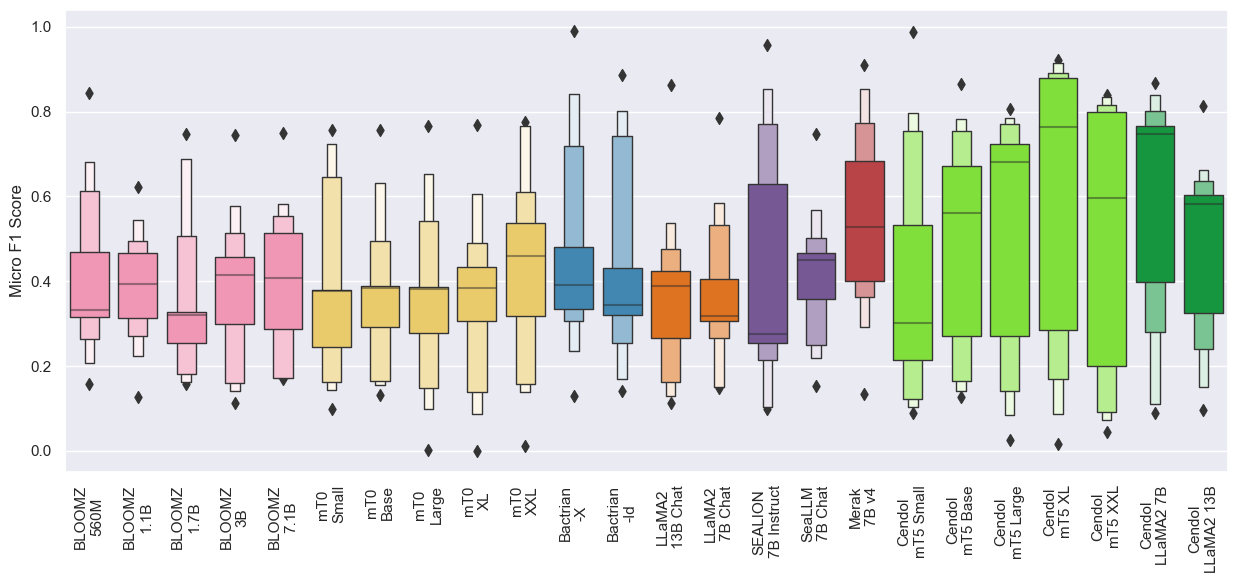

In [233]:
sns.set(rc={'figure.figsize':(15,6)})

pdf = df.groupby(['dataset', 'model', 'lang'])[['accuracy','micro_f1_score','macro_f1_score','weighted_f1_score']].mean().reset_index()
pdf = pdf[(~pdf['model'].str.contains('chat')) | (~pdf['model'].str.contains('cendol'))]
pdf['model_id'] = pdf['model'].apply(lambda x: model_to_index[x])
pdf['model_name'] = pdf['model'].apply(lambda x: model_to_display_name[x])
# sns.boxplot(pdf[pdf['lang'] == 'ind'].sort_values('model_id'), x='model', y='macro_f1_score', hue='model', dodge=False)
pdf = pdf[pdf['lang'] == 'ind'].sort_values('model_id')
ax = sns.boxenplot(data=pdf, x='model_name', y='micro_f1_score', hue='model', k_depth=3, dodge=False, palette=model_to_color.values())
# sns.stripplot(pdf[pdf['lang'] == 'ind'].sort_values('model_id'), x='model', y='weighted_f1_score', hue='model', legend=False, alpha=.8)
# plt.legend(loc='upper left', bbox_to_anchor=(0, 1.2), ncols=6)
ax.get_legend().set_visible(False)
plt.xticks(rotation=90)
plt.ylabel('Micro F1 Score')
plt.xlabel(None)
plt.savefig('./figures/micro_f1_score.pdf', bbox_inches='tight')
plt.show()

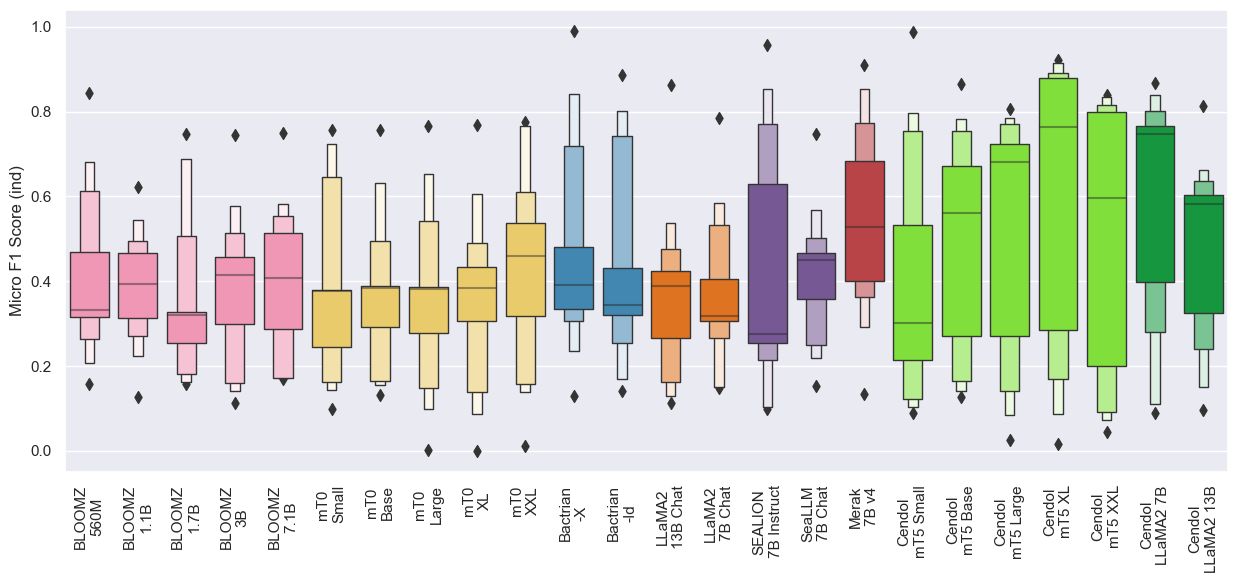

In [234]:
sns.set(rc={'figure.figsize':(15,6)})

pdf = df.groupby(['dataset', 'model', 'lang'])[['accuracy','micro_f1_score','macro_f1_score','weighted_f1_score']].mean().reset_index()
pdf = pdf[(~pdf['model'].str.contains('chat')) | (~pdf['model'].str.contains('cendol'))]
pdf['model_id'] = pdf['model'].apply(lambda x: model_to_index[x])
pdf['model_name'] = pdf['model'].apply(lambda x: model_to_display_name[x])
# sns.boxplot(pdf[pdf['lang'] == 'ind'].sort_values('model_id'), x='model', y='macro_f1_score', hue='model', dodge=False)
pdf = pdf[pdf['lang'] == 'ind'].sort_values('model_id')
ax = sns.boxenplot(data=pdf, x='model_name', y='micro_f1_score', hue='model', k_depth=3, dodge=False, palette=model_to_color.values())
# sns.stripplot(pdf[pdf['lang'] == 'ind'].sort_values('model_id'), x='model', y='weighted_f1_score', hue='model', legend=False, alpha=.8)
# plt.legend(loc='upper left', bbox_to_anchor=(0, 1.2), ncols=6)
ax.get_legend().set_visible(False)
plt.xticks(rotation=90)
plt.ylabel('Micro F1 Score (ind)')
plt.xlabel(None)
plt.savefig('./figures/micro_f1_score_ind.pdf', bbox_inches='tight')
plt.show()

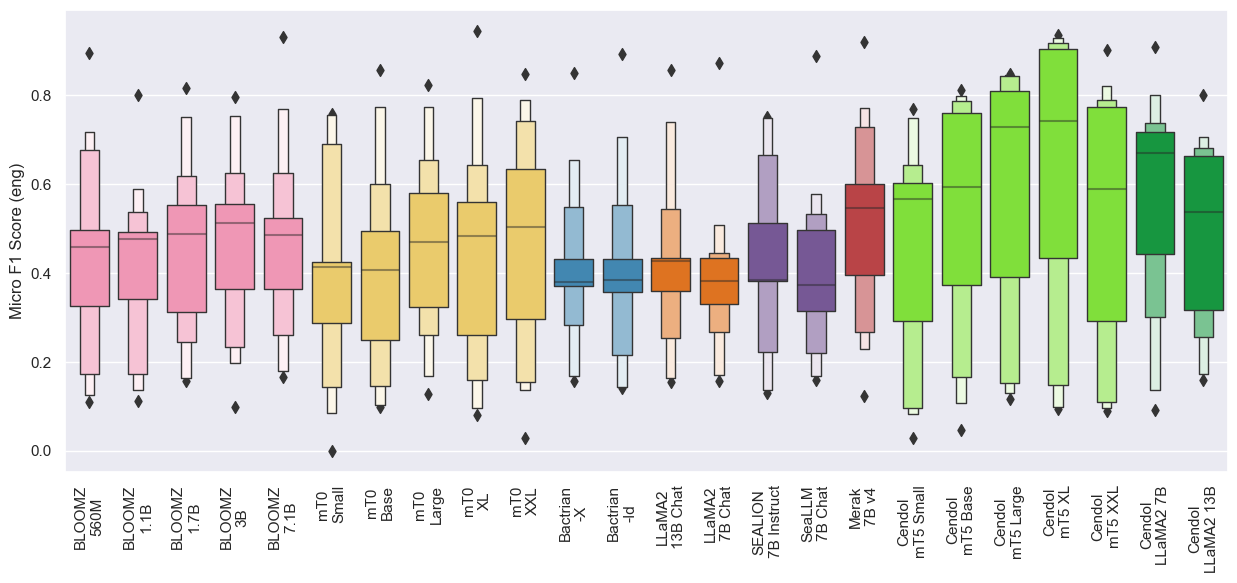

In [235]:
sns.set(rc={'figure.figsize':(15,6)})

pdf = df.groupby(['dataset', 'model', 'lang'])[['accuracy','micro_f1_score','macro_f1_score','weighted_f1_score']].mean().reset_index()
pdf = pdf[(~pdf['model'].str.contains('chat')) | (~pdf['model'].str.contains('cendol'))]
pdf['model_id'] = pdf['model'].apply(lambda x: model_to_index[x])
pdf['model_name'] = pdf['model'].apply(lambda x: model_to_display_name[x])
# sns.boxplot(pdf[pdf['lang'] == 'ind'].sort_values('model_id'), x='model', y='macro_f1_score', hue='model', dodge=False)
pdf = pdf[pdf['lang'] == 'eng'].sort_values('model_id')
ax = sns.boxenplot(data=pdf, x='model_name', y='micro_f1_score', hue='model', k_depth=3, dodge=False, palette=model_to_color.values())
# sns.stripplot(pdf[pdf['lang'] == 'ind'].sort_values('model_id'), x='model', y='weighted_f1_score', hue='model', legend=False, alpha=.8)
# plt.legend(loc='upper left', bbox_to_anchor=(0, 1.2), ncols=6)
ax.get_legend().set_visible(False)
plt.xticks(rotation=90)
plt.ylabel('Micro F1 Score (eng)')
plt.xlabel(None)
plt.savefig('./figures/micro_f1_score_eng.pdf', bbox_inches='tight')
plt.show()

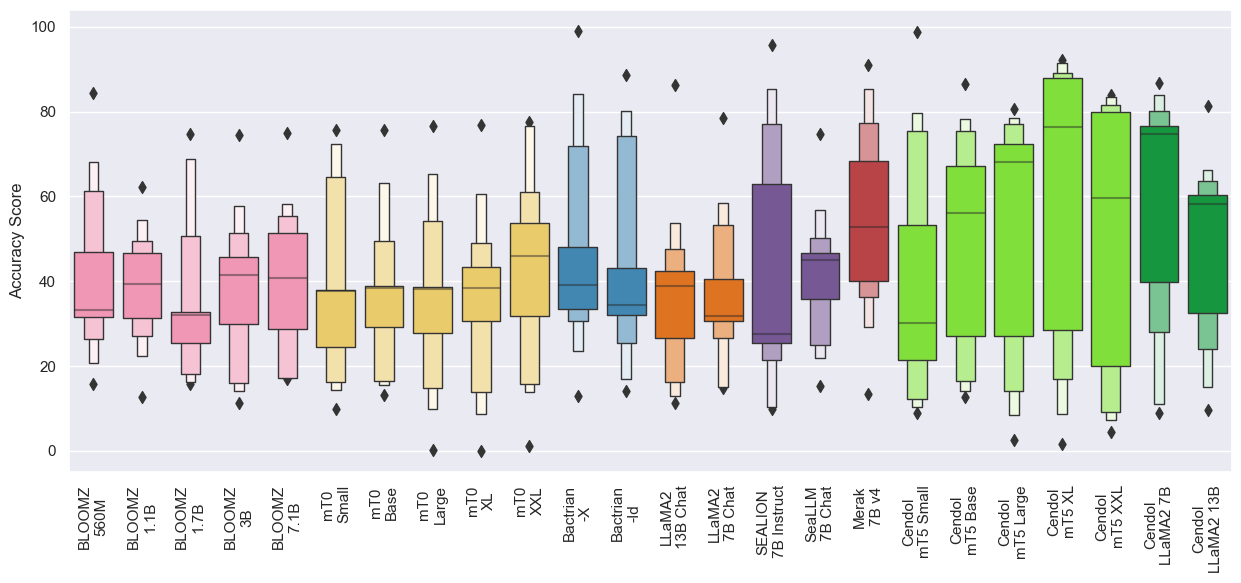

In [236]:
sns.set(rc={'figure.figsize':(15,6)})

pdf = df.groupby(['dataset', 'model', 'lang'])[['accuracy','micro_f1_score','macro_f1_score','weighted_f1_score']].mean().reset_index()
pdf = pdf[(~pdf['model'].str.contains('chat')) | (~pdf['model'].str.contains('cendol'))]
pdf['model_id'] = pdf['model'].apply(lambda x: model_to_index[x])
pdf['model_name'] = pdf['model'].apply(lambda x: model_to_display_name[x])
# sns.boxplot(pdf[pdf['lang'] == 'ind'].sort_values('model_id'), x='model', y='macro_f1_score', hue='model', dodge=False)
pdf = pdf[pdf['lang'] == 'ind'].sort_values('model_id')
ax = sns.boxenplot(data=pdf, x='model_name', y='accuracy', hue='model', k_depth=3, dodge=False, palette=model_to_color.values())
# sns.stripplot(pdf[pdf['lang'] == 'ind'].sort_values('model_id'), x='model', y='weighted_f1_score', hue='model', legend=False, alpha=.8)
# plt.legend(loc='upper left', bbox_to_anchor=(0, 1.2), ncols=6)
ax.get_legend().set_visible(False)
plt.xticks(rotation=90)
plt.ylabel('Accuracy Score')
plt.xlabel(None)
plt.savefig('./figures/accuracy.pdf', bbox_inches='tight')
plt.show()

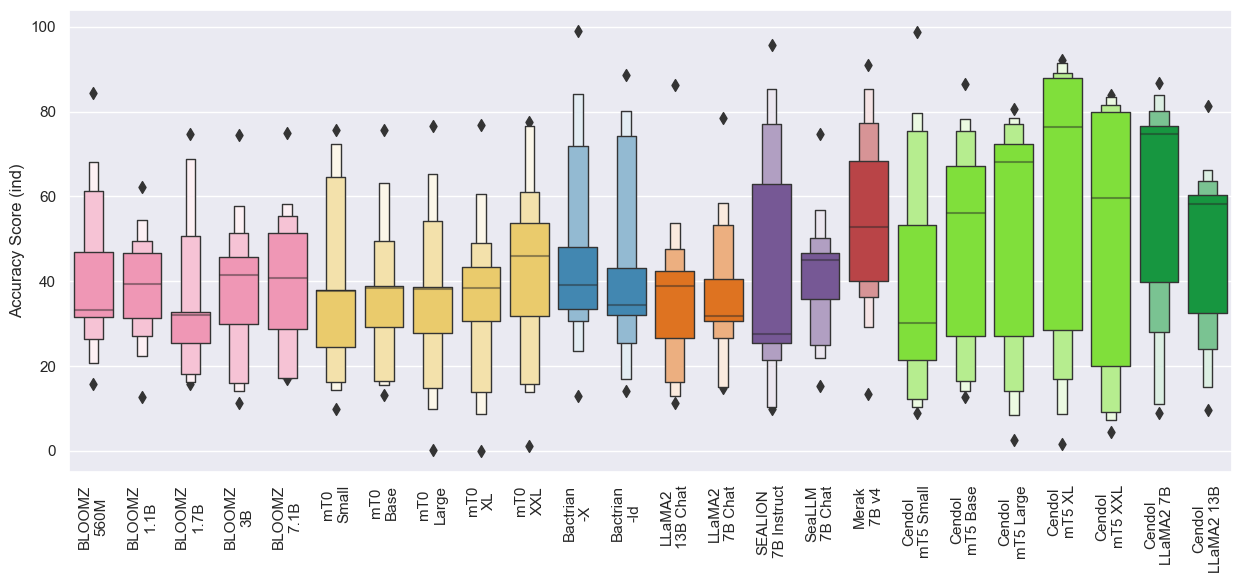

In [237]:
sns.set(rc={'figure.figsize':(15,6)})

pdf = df.groupby(['dataset', 'model', 'lang'])[['accuracy','micro_f1_score','macro_f1_score','weighted_f1_score']].mean().reset_index()
pdf = pdf[(~pdf['model'].str.contains('chat')) | (~pdf['model'].str.contains('cendol'))]
pdf['model_id'] = pdf['model'].apply(lambda x: model_to_index[x])
pdf['model_name'] = pdf['model'].apply(lambda x: model_to_display_name[x])
# sns.boxplot(pdf[pdf['lang'] == 'ind'].sort_values('model_id'), x='model', y='macro_f1_score', hue='model', dodge=False)
pdf = pdf[pdf['lang'] == 'ind'].sort_values('model_id')
ax = sns.boxenplot(data=pdf, x='model_name', y='accuracy', hue='model', k_depth=3, dodge=False, palette=model_to_color.values())
# sns.stripplot(pdf[pdf['lang'] == 'ind'].sort_values('model_id'), x='model', y='weighted_f1_score', hue='model', legend=False, alpha=.8)
# plt.legend(loc='upper left', bbox_to_anchor=(0, 1.2), ncols=6)
ax.get_legend().set_visible(False)
plt.xticks(rotation=90)
plt.ylabel('Accuracy Score (ind)')
plt.xlabel(None)
plt.savefig('./figures/accuracy_ind.pdf', bbox_inches='tight')
plt.show()

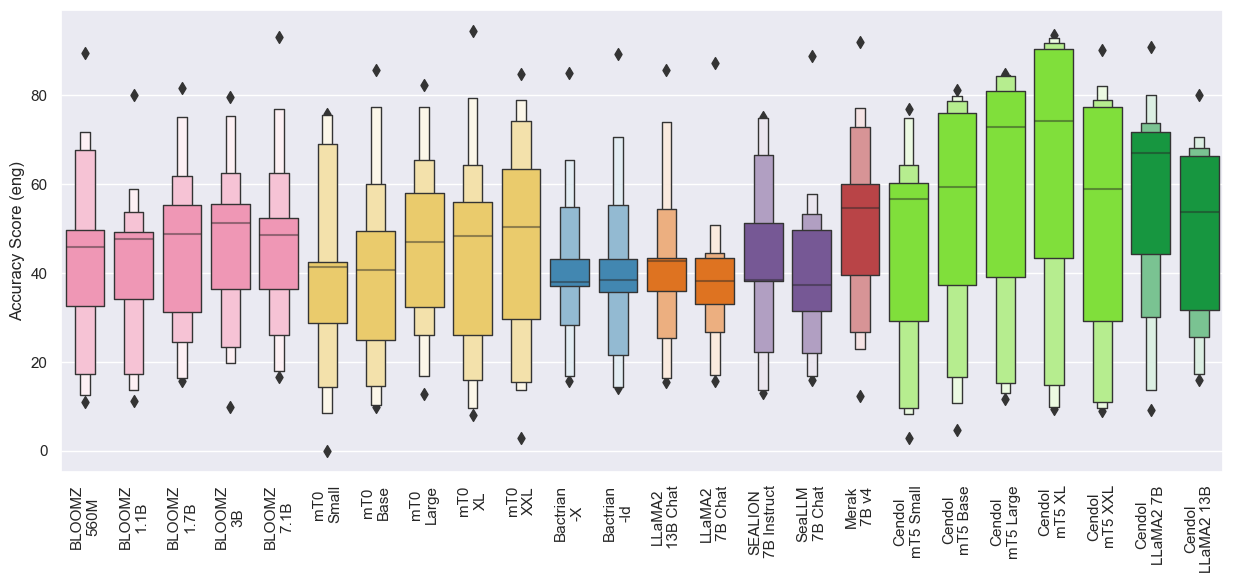

In [238]:
sns.set(rc={'figure.figsize':(15,6)})

pdf = df.groupby(['dataset', 'model', 'lang'])[['accuracy','micro_f1_score','macro_f1_score','weighted_f1_score']].mean().reset_index()
pdf = pdf[(~pdf['model'].str.contains('chat')) | (~pdf['model'].str.contains('cendol'))]
pdf['model_id'] = pdf['model'].apply(lambda x: model_to_index[x])
pdf['model_name'] = pdf['model'].apply(lambda x: model_to_display_name[x])
# sns.boxplot(pdf[pdf['lang'] == 'ind'].sort_values('model_id'), x='model', y='macro_f1_score', hue='model', dodge=False)
pdf = pdf[pdf['lang'] == 'eng'].sort_values('model_id')
ax = sns.boxenplot(data=pdf, x='model_name', y='accuracy', hue='model', k_depth=3, dodge=False, palette=model_to_color.values())
# sns.stripplot(pdf[pdf['lang'] == 'ind'].sort_values('model_id'), x='model', y='weighted_f1_score', hue='model', legend=False, alpha=.8)
# plt.legend(loc='upper left', bbox_to_anchor=(0, 1.2), ncols=6)
ax.get_legend().set_visible(False)
plt.xticks(rotation=90)
plt.ylabel('Accuracy Score (eng)')
plt.xlabel(None)
plt.savefig('./figures/accuracy_eng.pdf', bbox_inches='tight')
plt.show()

# NLG (SCORE PER TASK)

In [272]:
dfs = []
for path in glob.glob('metrics_nlg/*.csv'):
    model = path[:-4].split('_')[-1]
    if model == 'sealion7b':
        continue
    lang = path.split('results')[1].split('_')[1]
    df = pd.read_csv(path).set_index('index')
    df['BLEU'] = df['BLEU'].astype(float)
    df['SacreBLEU'] = df['SacreBLEU'].astype(float)
    df['chrF++'] = df['chrF++'].astype(float)
    df['ROUGE1'] = df['ROUGE1'].astype(float)
    df['ROUGE2'] = df['ROUGE2'].astype(float)
    df['ROUGEL'] = df['ROUGEL'].astype(float)
    df['ROUGELsum'] = df['ROUGELsum'].astype(float)
    df['model'] = model
    df['lang'] = lang
    dfs.append(df)
df = pd.concat(dfs)
df = df[df['dataset'] != 'xpersona_id_nusantara_t2t']

In [273]:
df[df['model'].str.contains('cendol')].to_csv('combine_nlg.csv')

In [274]:
df[(df['lang'] == 'ind')].groupby(['model','lang'])[['SacreBLEU','ROUGE1', 'ROUGE2', 'ROUGEL','chrF++']].mean().sort_values(['model','SacreBLEU'])

,,SacreBLEU,ROUGE1,ROUGE2,ROUGEL,chrF++
model,lang,,,,,
Llama-2-13b-chat-hf,ind,3.491855,17.408252,6.397490,16.070944,31.748986
Llama-2-7b-chat-hf,ind,2.855489,14.940335,5.464974,13.984853,29.982405
Merak-7B-v4,ind,2.754213,15.345768,4.218233,13.590762,28.776106
SeaLLM-7B-Chat,ind,3.222374,18.395567,5.903341,16.256607,32.251991
bactrian-id-bloom-7b1-lora,ind,2.512010,14.968249,4.749311,13.523019,26.941885
bactrian-x-bloom-7b1-lora,ind,1.043114,9.106870,2.397877,8.151451,22.771275
bloomz-1b1,ind,3.687485,14.283274,4.299907,13.150481,23.435741
bloomz-1b7,ind,4.278578,13.089773,4.583733,12.221784,21.904319
bloomz-3b,ind,5.823659,17.926600,6.533066,16.704965,26.202500


In [275]:
df[(df['lang'] == 'eng')].groupby(['model','lang'])[['SacreBLEU','ROUGE1', 'ROUGE2', 'ROUGEL','chrF++']].mean().sort_values(['model','SacreBLEU'])

,,SacreBLEU,ROUGE1,ROUGE2,ROUGEL,chrF++
model,lang,,,,,
Llama-2-13b-chat-hf,eng,1.831031,9.172567,3.244235,8.687830,24.844185
Llama-2-7b-chat-hf,eng,1.911577,10.150166,3.578563,9.771467,25.572762
Merak-7B-v4,eng,3.145723,16.098953,4.697591,14.358742,28.885337
SeaLLM-7B-Chat,eng,2.546884,15.001918,4.757914,13.497175,29.637783
bactrian-id-bloom-7b1-lora,eng,1.828950,10.260876,3.261739,9.552469,22.647129
bactrian-x-bloom-7b1-lora,eng,0.814679,6.063270,1.687972,5.596476,20.157295
bloomz-1b1,eng,4.145185,15.850170,4.941602,14.548177,24.360352
bloomz-1b7,eng,6.753898,19.686551,7.411420,18.570691,28.959221
bloomz-3b,eng,7.022884,19.892330,7.662295,18.663869,28.368598


# STIF

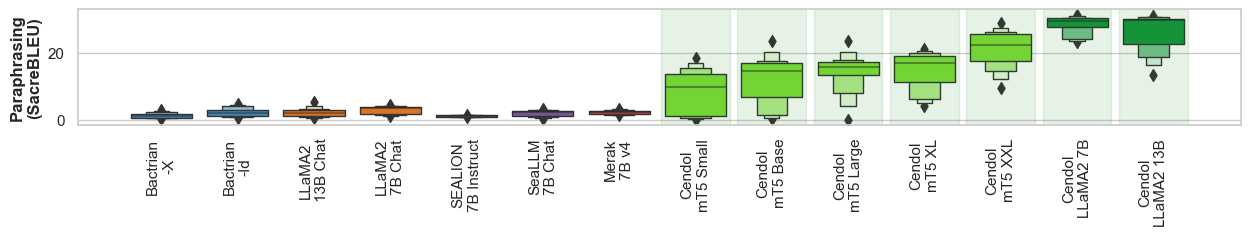

In [337]:
sns.set(rc={'figure.figsize':(15, 1.5)})

sns.set_theme(style="whitegrid", palette=None)

pdf = df.copy()
pdf['model_id'] = pdf['model'].apply(lambda x: model_to_index[x])
pdf['model_name'] = pdf['model'].apply(lambda x: model_to_display_name[x])
pdf = pdf[pdf['dataset'] == 'stif_indonesia_nusantara_t2t']
pdf = pdf[(~pdf['model'].str.contains('chat')) | (~pdf['model'].str.contains('cendol'))]
pdf = pdf[(~pdf['model'].str.startswith('bloomz-')) & (~pdf['model'].str.startswith('mt0'))]
# sns.boxplot(pdf[pdf['lang'] == 'ind'].sort_values('model_id'), x='model', y='macro_f1_score', hue='model', dodge=False)
pdf = pdf.sort_values('model_id')
ax = sns.boxenplot(data=pdf, x='model_name', y='SacreBLEU', hue='model', k_depth=3, dodge=False, palette=list(model_to_color.values())[10:])

# sns.stripplot(pdf[pdf['lang'] == 'ind'].sort_values('model_id'), x='model', y='weighted_f1_score', hue='model', legend=False, alpha=.8)
# plt.legend(loc='upper left', bbox_to_anchor=(0, 1.15), ncols=6)

n_model = len(pdf["model_name"].unique())
for i in range(n_model-7, n_model):
    ax.axvspan(i-0.45,i+0.45, color='green', alpha=0.1)

ax.get_legend().set_visible(False)
plt.xticks(rotation=90)
plt.ylabel('Paraphrasing\n(SacreBLEU)', fontdict={'weight': 'bold'})
plt.xlabel(None)
# plt.xticks([], [])
plt.savefig('./figures/bleu_stif.pdf', bbox_inches='tight')
plt.show()

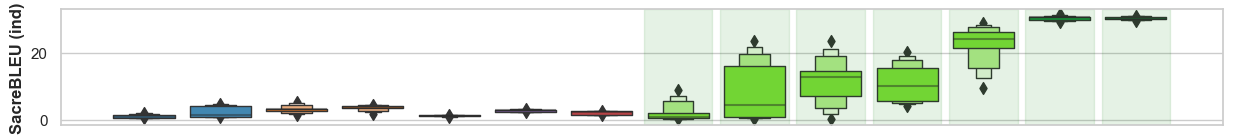

In [338]:
sns.set(rc={'figure.figsize':(15, 1.5)})

sns.set_theme(style="whitegrid", palette=None)

pdf = df.copy()
pdf['model_id'] = pdf['model'].apply(lambda x: model_to_index[x])
pdf['model_name'] = pdf['model'].apply(lambda x: model_to_display_name[x])
pdf = pdf[pdf['dataset'] == 'stif_indonesia_nusantara_t2t']
pdf = pdf[(~pdf['model'].str.contains('chat')) | (~pdf['model'].str.contains('cendol'))]
pdf = pdf[(~pdf['model'].str.startswith('bloomz-')) & (~pdf['model'].str.startswith('mt0'))]
# sns.boxplot(pdf[pdf['lang'] == 'ind'].sort_values('model_id'), x='model', y='macro_f1_score', hue='model', dodge=False)
pdf = pdf[pdf['lang'] == 'ind'].sort_values('model_id')
ax = sns.boxenplot(data=pdf, x='model_name', y='SacreBLEU', hue='model', k_depth=3, dodge=False, palette=list(model_to_color.values())[10:])

# sns.stripplot(pdf[pdf['lang'] == 'ind'].sort_values('model_id'), x='model', y='weighted_f1_score', hue='model', legend=False, alpha=.8)
# plt.legend(loc='upper left', bbox_to_anchor=(0, 1.15), ncols=6)
n_model = len(pdf["model_name"].unique())
for i in range(n_model-7, n_model):
    ax.axvspan(i-0.45,i+0.45, color='green', alpha=0.1)
    
ax.get_legend().set_visible(False)
plt.xticks(rotation=90)
plt.ylabel('SacreBLEU (ind)', fontdict={'weight': 'bold'})
plt.xlabel(None)
plt.xticks([], [])
plt.savefig('./figures/bleu_stif_ind.pdf', bbox_inches='tight')
plt.show()

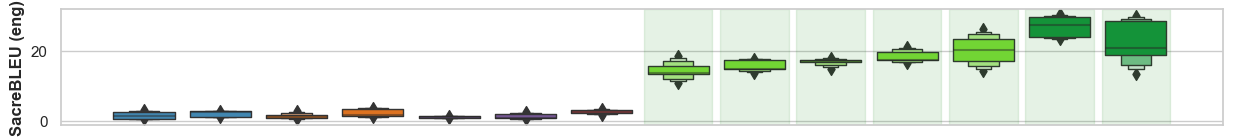

In [339]:
sns.set(rc={'figure.figsize':(15, 1.5)})

sns.set_theme(style="whitegrid", palette=None)

pdf = df.copy()
pdf['model_id'] = pdf['model'].apply(lambda x: model_to_index[x])
pdf['model_name'] = pdf['model'].apply(lambda x: model_to_display_name[x])
pdf = pdf[pdf['dataset'] == 'stif_indonesia_nusantara_t2t']
pdf = pdf[(~pdf['model'].str.contains('chat')) | (~pdf['model'].str.contains('cendol'))]
pdf = pdf[(~pdf['model'].str.startswith('bloomz-')) & (~pdf['model'].str.startswith('mt0'))]
# sns.boxplot(pdf[pdf['lang'] == 'ind'].sort_values('model_id'), x='model', y='macro_f1_score', hue='model', dodge=False)
pdf = pdf[pdf['lang'] == 'eng'].sort_values('model_id')
ax = sns.boxenplot(data=pdf, x='model_name', y='SacreBLEU', hue='model', k_depth=3, dodge=False, palette=list(model_to_color.values())[10:])

# sns.stripplot(pdf[pdf['lang'] == 'ind'].sort_values('model_id'), x='model', y='weighted_f1_score', hue='model', legend=False, alpha=.8)
# plt.legend(loc='upper left', bbox_to_anchor=(0, 1.15), ncols=6)
n_model = len(pdf["model_name"].unique())
for i in range(n_model-7, n_model):
    ax.axvspan(i-0.45,i+0.45, color='green', alpha=0.1)
    
ax.get_legend().set_visible(False)
plt.xticks(rotation=90)
plt.ylabel('SacreBLEU (eng)', fontdict={'weight': 'bold'})
plt.xlabel(None)
plt.xticks([], [])
plt.savefig('./figures/bleu_stif_eng.pdf', bbox_inches='tight')
plt.show()

# MT Directional

### To Ind

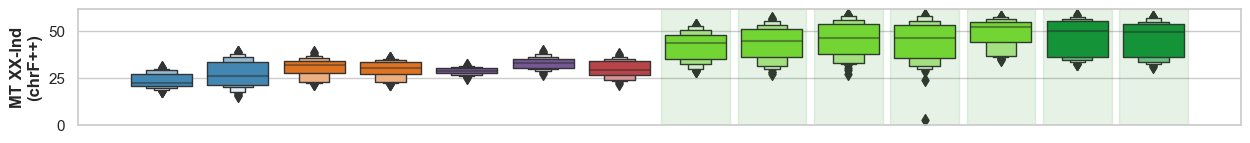

In [340]:
sns.set(rc={'figure.figsize':(15, 1.5)})

sns.set_theme(style="whitegrid", palette=None)

pdf = df.copy()
pdf['model_id'] = pdf['model'].apply(lambda x: model_to_index[x])
pdf['model_name'] = pdf['model'].apply(lambda x: model_to_display_name[x])
pdf = pdf[pdf['dataset'].str.endswith('ind_Latn')]
pdf = pdf[(~pdf['model'].str.contains('chat')) | (~pdf['model'].str.contains('cendol'))]
pdf = pdf[(~pdf['model'].str.startswith('bloomz-')) & (~pdf['model'].str.startswith('mt0'))]
# sns.boxplot(pdf[pdf['lang'] == 'ind'].sort_values('model_id'), x='model', y='macro_f1_score', hue='model', dodge=False)
pdf = pdf.sort_values('model_id')

ax = sns.boxenplot(data=pdf, x='model_name', y='chrF++', hue='model', k_depth=3, dodge=False, palette=list(model_to_color.values())[10:])

# sns.stripplot(pdf[pdf['lang'] == 'ind'].sort_values('model_id'), x='model', y='weighted_f1_score', hue='model', legend=False, alpha=.8)
# plt.legend(loc='upper left', bbox_to_anchor=(0, 1.15), ncols=6)
n_model = len(pdf["model_name"].unique())
for i in range(n_model-7, n_model):
    ax.axvspan(i-0.45,i+0.45, color='green', alpha=0.1)
    
ax.get_legend().set_visible(False)
plt.xticks(rotation=90)
plt.ylabel('MT XX-Ind\n(chrF++)', fontdict={'weight': 'bold'})
plt.xlabel(None)
plt.xticks([], [])
plt.savefig('./figures/chrf_mt2ind.pdf', bbox_inches='tight')
plt.show()

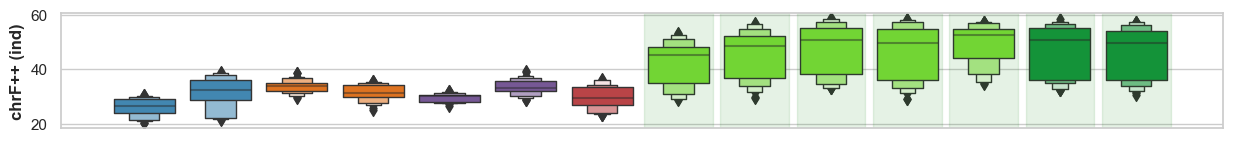

In [341]:
sns.set(rc={'figure.figsize':(15, 1.5)})

sns.set_theme(style="whitegrid", palette=None)

pdf = df.copy()
pdf['model_id'] = pdf['model'].apply(lambda x: model_to_index[x])
pdf['model_name'] = pdf['model'].apply(lambda x: model_to_display_name[x])
pdf = pdf[pdf['dataset'].str.endswith('ind_Latn')]
pdf = pdf[(~pdf['model'].str.contains('chat')) | (~pdf['model'].str.contains('cendol'))]
pdf = pdf[(~pdf['model'].str.startswith('bloomz-')) & (~pdf['model'].str.startswith('mt0'))]
# sns.boxplot(pdf[pdf['lang'] == 'ind'].sort_values('model_id'), x='model', y='macro_f1_score', hue='model', dodge=False)
pdf = pdf[pdf['lang'] == 'ind'].sort_values('model_id')

ax = sns.boxenplot(data=pdf, x='model_name', y='chrF++', hue='model', k_depth=3, dodge=False, palette=list(model_to_color.values())[10:])

# sns.stripplot(pdf[pdf['lang'] == 'ind'].sort_values('model_id'), x='model', y='weighted_f1_score', hue='model', legend=False, alpha=.8)
# plt.legend(loc='upper left', bbox_to_anchor=(0, 1.15), ncols=6)
n_model = len(pdf["model_name"].unique())
for i in range(n_model-7, n_model):
    ax.axvspan(i-0.45,i+0.45, color='green', alpha=0.1)
    
ax.get_legend().set_visible(False)
plt.xticks(rotation=90)
plt.ylabel('chrF++ (ind)', fontdict={'weight': 'bold'})
plt.xlabel(None)
plt.xticks([], [])
plt.savefig('./figures/chrf_mt2ind_ind.pdf', bbox_inches='tight')
plt.show()

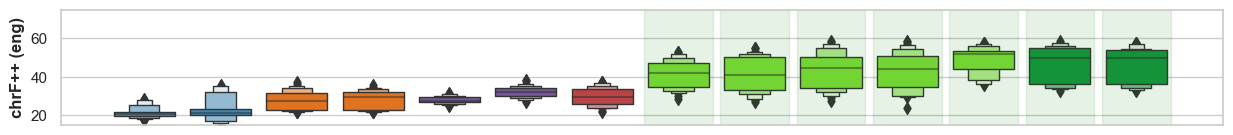

In [342]:
sns.set(rc={'figure.figsize':(15, 1.5)})

sns.set_theme(style="whitegrid", palette=None)

pdf = df.copy()
pdf['model_id'] = pdf['model'].apply(lambda x: model_to_index[x])
pdf['model_name'] = pdf['model'].apply(lambda x: model_to_display_name[x])
pdf = pdf[pdf['dataset'].str.endswith('ind_Latn')]
pdf = pdf[(~pdf['model'].str.contains('chat')) | (~pdf['model'].str.contains('cendol'))]
pdf = pdf[(~pdf['model'].str.startswith('bloomz-')) & (~pdf['model'].str.startswith('mt0'))]
# sns.boxplot(pdf[pdf['lang'] == 'ind'].sort_values('model_id'), x='model', y='macro_f1_score', hue='model', dodge=False)
pdf = pdf[pdf['lang'] == 'eng'].sort_values('model_id')

ax = sns.boxenplot(data=pdf, x='model_name', y='chrF++', hue='model', k_depth=3, dodge=False, palette=list(model_to_color.values())[10:])

# sns.stripplot(pdf[pdf['lang'] == 'ind'].sort_values('model_id'), x='model', y='weighted_f1_score', hue='model', legend=False, alpha=.8)
# plt.legend(loc='upper left', bbox_to_anchor=(0, 1.15), ncols=6)
n_model = len(pdf["model_name"].unique())
for i in range(n_model-7, n_model):
    ax.axvspan(i-0.45,i+0.45, color='green', alpha=0.1)
    
ax.get_legend().set_visible(False)
plt.xticks(rotation=90)
plt.ylim(15,75)
plt.ylabel('chrF++ (eng)', fontdict={'weight': 'bold'})
plt.xlabel(None)
plt.xticks([], [])
plt.savefig('./figures/chrf_mt2ind_eng.pdf', bbox_inches='tight')
plt.show()

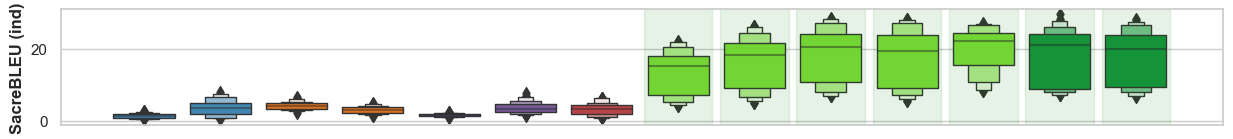

In [343]:
sns.set(rc={'figure.figsize':(15, 1.5)})

sns.set_theme(style="whitegrid", palette=None)

pdf = df.copy()
pdf['model_id'] = pdf['model'].apply(lambda x: model_to_index[x])
pdf['model_name'] = pdf['model'].apply(lambda x: model_to_display_name[x])
pdf = pdf[pdf['dataset'].str.endswith('ind_Latn')]
pdf = pdf[(~pdf['model'].str.contains('chat')) | (~pdf['model'].str.contains('cendol'))]
pdf = pdf[(~pdf['model'].str.startswith('bloomz-')) & (~pdf['model'].str.startswith('mt0'))]
# sns.boxplot(pdf[pdf['lang'] == 'ind'].sort_values('model_id'), x='model', y='macro_f1_score', hue='model', dodge=False)
pdf = pdf[pdf['lang'] == 'ind'].sort_values('model_id')

ax = sns.boxenplot(data=pdf, x='model_name', y='SacreBLEU', hue='model', k_depth=3, dodge=False, palette=list(model_to_color.values())[10:])

# sns.stripplot(pdf[pdf['lang'] == 'ind'].sort_values('model_id'), x='model', y='weighted_f1_score', hue='model', legend=False, alpha=.8)
# plt.legend(loc='upper left', bbox_to_anchor=(0, 1.15), ncols=6)
n_model = len(pdf["model_name"].unique())
for i in range(n_model-7, n_model):
    ax.axvspan(i-0.45,i+0.45, color='green', alpha=0.1)
    
ax.get_legend().set_visible(False)
plt.xticks(rotation=90)
plt.ylabel('SacreBLEU (ind)', fontdict={'weight': 'bold'})
plt.xlabel(None)
plt.xticks([], [])
plt.savefig('./figures/bleu_mt2ind_ind.pdf', bbox_inches='tight')
plt.show()

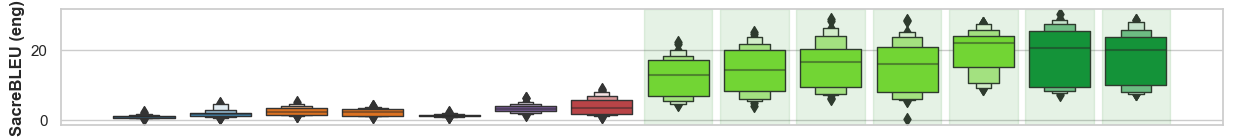

In [344]:
sns.set(rc={'figure.figsize':(15, 1.5)})

sns.set_theme(style="whitegrid", palette=None)

pdf = df.copy()
pdf['model_id'] = pdf['model'].apply(lambda x: model_to_index[x])
pdf['model_name'] = pdf['model'].apply(lambda x: model_to_display_name[x])
pdf = pdf[pdf['dataset'].str.endswith('ind_Latn')]
pdf = pdf[(~pdf['model'].str.contains('chat')) | (~pdf['model'].str.contains('cendol'))]
pdf = pdf[(~pdf['model'].str.startswith('bloomz-')) & (~pdf['model'].str.startswith('mt0'))]
# sns.boxplot(pdf[pdf['lang'] == 'ind'].sort_values('model_id'), x='model', y='macro_f1_score', hue='model', dodge=False)
pdf = pdf[pdf['lang'] == 'eng'].sort_values('model_id')

ax = sns.boxenplot(data=pdf, x='model_name', y='SacreBLEU', hue='model', k_depth=3, dodge=False, palette=list(model_to_color.values())[10:])

# sns.stripplot(pdf[pdf['lang'] == 'ind'].sort_values('model_id'), x='model', y='weighted_f1_score', hue='model', legend=False, alpha=.8)
# plt.legend(loc='upper left', bbox_to_anchor=(0, 1.15), ncols=6)
n_model = len(pdf["model_name"].unique())
for i in range(n_model-7, n_model):
    ax.axvspan(i-0.45,i+0.45, color='green', alpha=0.1)
    
ax.get_legend().set_visible(False)
plt.xticks(rotation=90)
plt.ylabel('SacreBLEU (eng)', fontdict={'weight': 'bold'})
plt.xlabel(None)
plt.xticks([], [])
plt.savefig('./figures/bleu_mt2ind_eng.pdf', bbox_inches='tight')
plt.show()

### From Ind

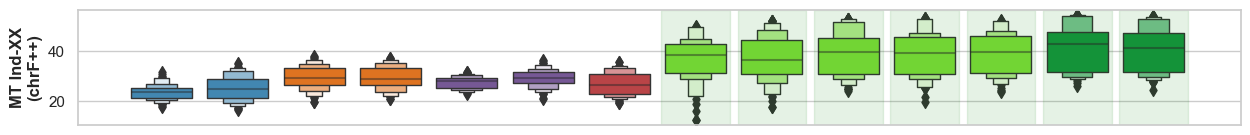

In [345]:
sns.set(rc={'figure.figsize':(15, 1.5)})

sns.set_theme(style="whitegrid", palette=None)

pdf = df.copy()
pdf['model_id'] = pdf['model'].apply(lambda x: model_to_index[x])
pdf['model_name'] = pdf['model'].apply(lambda x: model_to_display_name[x])
pdf = pdf[pdf['dataset'].str.contains('-ind_Latn-')]
pdf = pdf[(~pdf['model'].str.contains('chat')) | (~pdf['model'].str.contains('cendol'))]
pdf = pdf[(~pdf['model'].str.startswith('bloomz-')) & (~pdf['model'].str.startswith('mt0'))]
# sns.boxplot(pdf[pdf['lang'] == 'ind'].sort_values('model_id'), x='model', y='macro_f1_score', hue='model', dodge=False)
pdf = pdf.sort_values('model_id')

ax = sns.boxenplot(data=pdf, x='model_name', y='chrF++', hue='model', k_depth=3, dodge=False, palette=list(model_to_color.values())[10:])

# sns.stripplot(pdf[pdf['lang'] == 'ind'].sort_values('model_id'), x='model', y='weighted_f1_score', hue='model', legend=False, alpha=.8)
# plt.legend(loc='upper left', bbox_to_anchor=(0, 1.15), ncols=6)
n_model = len(pdf["model_name"].unique())
for i in range(n_model-7, n_model):
    ax.axvspan(i-0.45,i+0.45, color='green', alpha=0.1)
    
ax.get_legend().set_visible(False)
plt.xticks(rotation=90)
plt.ylabel('MT Ind-XX\n(chrF++)', fontdict={'weight': 'bold'})
plt.xlabel(None)
plt.xticks([], [])
plt.savefig('./figures/chrf_mt2oth.pdf', bbox_inches='tight')
plt.show()

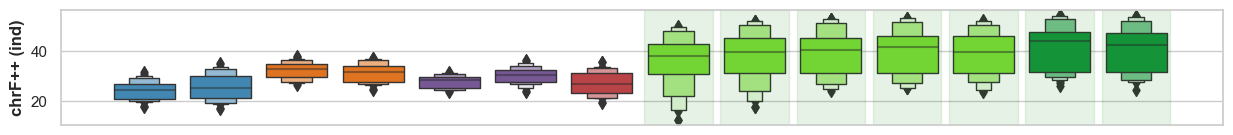

In [346]:
sns.set(rc={'figure.figsize':(15, 1.5)})

sns.set_theme(style="whitegrid", palette=None)

pdf = df.copy()
pdf['model_id'] = pdf['model'].apply(lambda x: model_to_index[x])
pdf['model_name'] = pdf['model'].apply(lambda x: model_to_display_name[x])
pdf = pdf[pdf['dataset'].str.contains('-ind_Latn-')]
pdf = pdf[(~pdf['model'].str.contains('chat')) | (~pdf['model'].str.contains('cendol'))]
pdf = pdf[(~pdf['model'].str.startswith('bloomz-')) & (~pdf['model'].str.startswith('mt0'))]
# sns.boxplot(pdf[pdf['lang'] == 'ind'].sort_values('model_id'), x='model', y='macro_f1_score', hue='model', dodge=False)
pdf = pdf[pdf['lang'] == 'ind'].sort_values('model_id')

ax = sns.boxenplot(data=pdf, x='model_name', y='chrF++', hue='model', k_depth=3, dodge=False, palette=list(model_to_color.values())[10:])

# sns.stripplot(pdf[pdf['lang'] == 'ind'].sort_values('model_id'), x='model', y='weighted_f1_score', hue='model', legend=False, alpha=.8)
# plt.legend(loc='upper left', bbox_to_anchor=(0, 1.15), ncols=6)
n_model = len(pdf["model_name"].unique())
for i in range(n_model-7, n_model):
    ax.axvspan(i-0.45,i+0.45, color='green', alpha=0.1)
    
ax.get_legend().set_visible(False)
plt.xticks(rotation=90)
plt.ylabel('chrF++ (ind)', fontdict={'weight': 'bold'})
plt.xlabel(None)
plt.xticks([], [])
plt.savefig('./figures/chrf_mt2oth_ind.pdf', bbox_inches='tight')
plt.show()

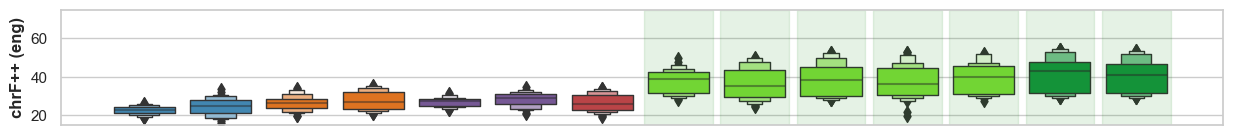

In [347]:
sns.set(rc={'figure.figsize':(15, 1.5)})

sns.set_theme(style="whitegrid", palette=None)

pdf = df.copy()
pdf['model_id'] = pdf['model'].apply(lambda x: model_to_index[x])
pdf['model_name'] = pdf['model'].apply(lambda x: model_to_display_name[x])
pdf = pdf[pdf['dataset'].str.contains('-ind_Latn-')]
pdf = pdf[(~pdf['model'].str.contains('chat')) | (~pdf['model'].str.contains('cendol'))]
pdf = pdf[(~pdf['model'].str.startswith('bloomz-')) & (~pdf['model'].str.startswith('mt0'))]
# sns.boxplot(pdf[pdf['lang'] == 'ind'].sort_values('model_id'), x='model', y='macro_f1_score', hue='model', dodge=False)
pdf = pdf[pdf['lang'] == 'eng'].sort_values('model_id')

ax = sns.boxenplot(data=pdf, x='model_name', y='chrF++', hue='model', k_depth=3, dodge=False, palette=list(model_to_color.values())[10:])

# sns.stripplot(pdf[pdf['lang'] == 'ind'].sort_values('model_id'), x='model', y='weighted_f1_score', hue='model', legend=False, alpha=.8)
# plt.legend(loc='upper left', bbox_to_anchor=(0, 1.15), ncols=6)
n_model = len(pdf["model_name"].unique())
for i in range(n_model-7, n_model):
    ax.axvspan(i-0.45,i+0.45, color='green', alpha=0.1)
    
ax.get_legend().set_visible(False)
plt.xticks(rotation=90)
plt.ylim(15,75)
plt.ylabel('chrF++ (eng)', fontdict={'weight': 'bold'})
plt.xlabel(None)
plt.xticks([], [])
plt.savefig('./figures/chrf_mt2oth_eng.pdf', bbox_inches='tight')
plt.show()

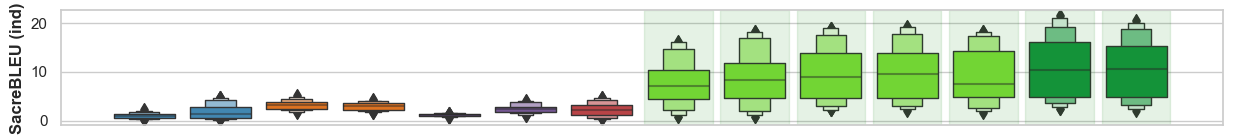

In [348]:
sns.set(rc={'figure.figsize':(15, 1.5)})

sns.set_theme(style="whitegrid", palette=None)

pdf = df.copy()
pdf['model_id'] = pdf['model'].apply(lambda x: model_to_index[x])
pdf['model_name'] = pdf['model'].apply(lambda x: model_to_display_name[x])
pdf = pdf[pdf['dataset'].str.contains('-ind_Latn-')]
pdf = pdf[(~pdf['model'].str.contains('chat')) | (~pdf['model'].str.contains('cendol'))]
pdf = pdf[(~pdf['model'].str.startswith('bloomz-')) & (~pdf['model'].str.startswith('mt0'))]
# sns.boxplot(pdf[pdf['lang'] == 'ind'].sort_values('model_id'), x='model', y='macro_f1_score', hue='model', dodge=False)
pdf = pdf[pdf['lang'] == 'ind'].sort_values('model_id')

ax = sns.boxenplot(data=pdf, x='model_name', y='SacreBLEU', hue='model', k_depth=3, dodge=False, palette=list(model_to_color.values())[10:])

# sns.stripplot(pdf[pdf['lang'] == 'ind'].sort_values('model_id'), x='model', y='weighted_f1_score', hue='model', legend=False, alpha=.8)
# plt.legend(loc='upper left', bbox_to_anchor=(0, 1.15), ncols=6)
n_model = len(pdf["model_name"].unique())
for i in range(n_model-7, n_model):
    ax.axvspan(i-0.45,i+0.45, color='green', alpha=0.1)
    
ax.get_legend().set_visible(False)
plt.xticks(rotation=90)
plt.ylabel('SacreBLEU (ind)', fontdict={'weight': 'bold'})
plt.xlabel(None)
plt.xticks([], [])
plt.savefig('./figures/bleu_mt2oth_ind.pdf', bbox_inches='tight')
plt.show()

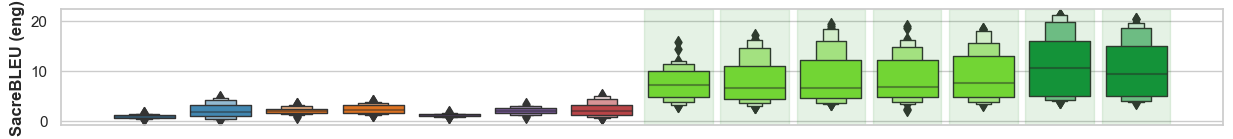

In [349]:
sns.set(rc={'figure.figsize':(15, 1.5)})

sns.set_theme(style="whitegrid", palette=None)

pdf = df.copy()
pdf['model_id'] = pdf['model'].apply(lambda x: model_to_index[x])
pdf['model_name'] = pdf['model'].apply(lambda x: model_to_display_name[x])
pdf = pdf[pdf['dataset'].str.contains('-ind_Latn-')]
pdf = pdf[(~pdf['model'].str.contains('chat')) | (~pdf['model'].str.contains('cendol'))]
pdf = pdf[(~pdf['model'].str.startswith('bloomz-')) & (~pdf['model'].str.startswith('mt0'))]
# sns.boxplot(pdf[pdf['lang'] == 'ind'].sort_values('model_id'), x='model', y='macro_f1_score', hue='model', dodge=False)
pdf = pdf[pdf['lang'] == 'eng'].sort_values('model_id')

ax = sns.boxenplot(data=pdf, x='model_name', y='SacreBLEU', hue='model', k_depth=3, dodge=False, palette=list(model_to_color.values())[10:])

# sns.stripplot(pdf[pdf['lang'] == 'ind'].sort_values('model_id'), x='model', y='weighted_f1_score', hue='model', legend=False, alpha=.8)
# plt.legend(loc='upper left', bbox_to_anchor=(0, 1.15), ncols=6)
n_model = len(pdf["model_name"].unique())
for i in range(n_model-7, n_model):
    ax.axvspan(i-0.45,i+0.45, color='green', alpha=0.1)
    
ax.get_legend().set_visible(False)
plt.xticks(rotation=90)
plt.ylabel('SacreBLEU (eng)', fontdict={'weight': 'bold'})
plt.xlabel(None)
plt.xticks([], [])
plt.savefig('./figures/bleu_mt2oth_eng.pdf', bbox_inches='tight')
plt.show()

## TydiQA

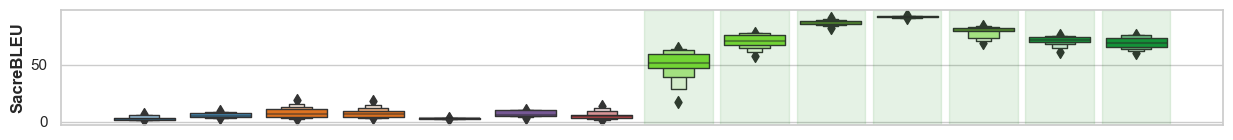

In [350]:
sns.set(rc={'figure.figsize':(15, 1.5)})

sns.set_theme(style="whitegrid", palette=None)

pdf = df.copy()
pdf['model_id'] = pdf['model'].apply(lambda x: model_to_index[x])
pdf['model_name'] = pdf['model'].apply(lambda x: model_to_display_name[x])
pdf = pdf[pdf['dataset'] == 'tydiqa_id_nusantara_qa']
pdf = pdf[(~pdf['model'].str.contains('chat')) | (~pdf['model'].str.contains('cendol'))]
pdf = pdf[(~pdf['model'].str.startswith('bloomz-')) & (~pdf['model'].str.startswith('mt0'))]
pdf = pdf.sort_values('model_id')
          
ax = sns.boxenplot(data=pdf, x='model_name', y='SacreBLEU', hue='model', k_depth=3, dodge=False, palette=list(model_to_color.values())[10:])

# sns.stripplot(pdf[pdf['lang'] == 'ind'].sort_values('model_id'), x='model', y='weighted_f1_score', hue='model', legend=False, alpha=.8)
# plt.legend(loc='upper left', bbox_to_anchor=(0, 1.15), ncols=6)
n_model = len(pdf["model_name"].unique())
for i in range(n_model-7, n_model):
    ax.axvspan(i-0.45,i+0.45, color='green', alpha=0.1)
    
ax.get_legend().set_visible(False)
plt.xticks(rotation=90)
plt.ylabel('SacreBLEU', fontdict={'weight': 'bold'})
plt.xlabel(None)
plt.xticks([], [])
plt.savefig('sacrebleu_qa.pdf', bbox_inches='tight')
plt.show()

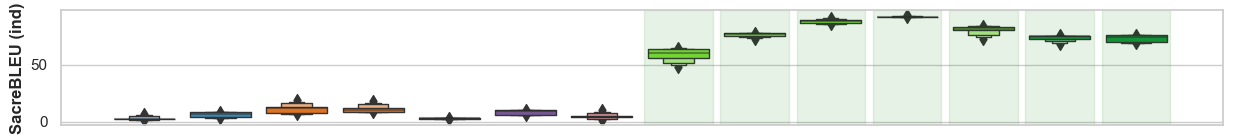

In [351]:
sns.set(rc={'figure.figsize':(15, 1.5)})

sns.set_theme(style="whitegrid", palette=None)

pdf = df.copy()
pdf['model_id'] = pdf['model'].apply(lambda x: model_to_index[x])
pdf['model_name'] = pdf['model'].apply(lambda x: model_to_display_name[x])
pdf = pdf[pdf['dataset'] == 'tydiqa_id_nusantara_qa']
pdf = pdf[(~pdf['model'].str.contains('chat')) | (~pdf['model'].str.contains('cendol'))]
pdf = pdf[(~pdf['model'].str.startswith('bloomz-')) & (~pdf['model'].str.startswith('mt0'))]
pdf = pdf[pdf['lang'] == 'ind'].sort_values('model_id')
          
ax = sns.boxenplot(data=pdf, x='model_name', y='SacreBLEU', hue='model', k_depth=3, dodge=False, palette=list(model_to_color.values())[10:])

# sns.stripplot(pdf[pdf['lang'] == 'ind'].sort_values('model_id'), x='model', y='weighted_f1_score', hue='model', legend=False, alpha=.8)
# plt.legend(loc='upper left', bbox_to_anchor=(0, 1.15), ncols=6)
n_model = len(pdf["model_name"].unique())
for i in range(n_model-7, n_model):
    ax.axvspan(i-0.45,i+0.45, color='green', alpha=0.1)
    
ax.get_legend().set_visible(False)
plt.xticks(rotation=90)
plt.ylabel('SacreBLEU (ind)', fontdict={'weight': 'bold'})
plt.xlabel(None)
plt.xticks([], [])
plt.savefig('sacrebleu_qa_ind.pdf', bbox_inches='tight')
plt.show()

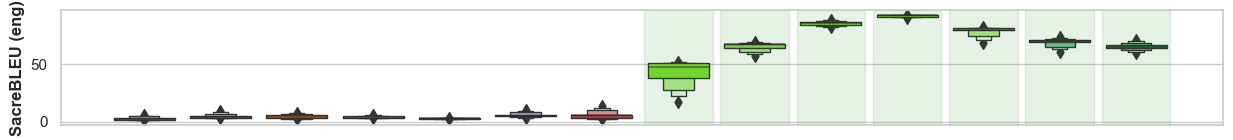

In [352]:
sns.set(rc={'figure.figsize':(15, 1.5)})

sns.set_theme(style="whitegrid", palette=None)

pdf = df.copy()
pdf['model_id'] = pdf['model'].apply(lambda x: model_to_index[x])
pdf['model_name'] = pdf['model'].apply(lambda x: model_to_display_name[x])
pdf = pdf[pdf['dataset'] == 'tydiqa_id_nusantara_qa']
pdf = pdf[(~pdf['model'].str.contains('chat')) | (~pdf['model'].str.contains('cendol'))]
pdf = pdf[(~pdf['model'].str.startswith('bloomz-')) & (~pdf['model'].str.startswith('mt0'))]
pdf = pdf[pdf['lang'] == 'eng'].sort_values('model_id')
          
ax = sns.boxenplot(data=pdf, x='model_name', y='SacreBLEU', hue='model', k_depth=3, dodge=False, palette=list(model_to_color.values())[10:])

# sns.stripplot(pdf[pdf['lang'] == 'ind'].sort_values('model_id'), x='model', y='weighted_f1_score', hue='model', legend=False, alpha=.8)
# plt.legend(loc='upper left', bbox_to_anchor=(0, 1.15), ncols=6)
n_model = len(pdf["model_name"].unique())
for i in range(n_model-7, n_model):
    ax.axvspan(i-0.45,i+0.45, color='green', alpha=0.1)
    
ax.get_legend().set_visible(False)
plt.xticks(rotation=90)
plt.ylabel('SacreBLEU (eng)', fontdict={'weight': 'bold'})
plt.xlabel(None)
plt.xticks([], [])
plt.savefig('sacrebleu_qa_eng.pdf', bbox_inches='tight')
plt.show()

# Summarization

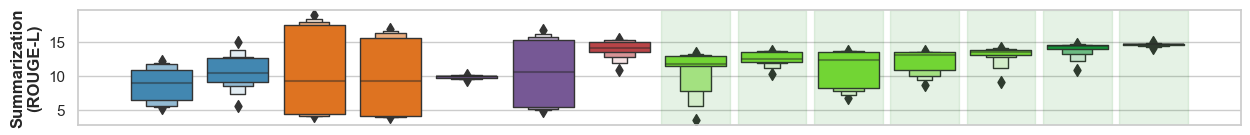

In [353]:
sns.set(rc={'figure.figsize':(15, 1.5)})

sns.set_theme(style="whitegrid", palette=None)

pdf = df.copy()
pdf['model_id'] = pdf['model'].apply(lambda x: model_to_index[x])
pdf['model_name'] = pdf['model'].apply(lambda x: model_to_display_name[x])
pdf = pdf[pdf['dataset'] == 'xl_sum_nusantara_t2t']
pdf = pdf[(~pdf['model'].str.contains('chat')) | (~pdf['model'].str.contains('cendol'))]
pdf = pdf[(~pdf['model'].str.startswith('bloomz-')) & (~pdf['model'].str.startswith('mt0'))]
pdf = pdf.sort_values('model_id')

ax = sns.boxenplot(data=pdf, x='model_name', y='ROUGEL', hue='model', k_depth=3, dodge=False, palette=list(model_to_color.values())[10:])
# sns.boxplot(pdf[(pdf['dataset'] == 'xl_sum_nusantara_t2t') & (pdf['lang'] == 'ind')].sort_values('model_id'), x='model', y='ROUGEL', hue='model', dodge=False)
# sns.stripplot(pdf[pdf['lang'] == 'ind'].sort_values('model_id'), x='model', y='weighted_f1_score', hue='model', legend=False, alpha=.8)
# plt.legend(loc='upper left', bbox_to_anchor=(0, 1.15), ncols=6)
n_model = len(pdf["model_name"].unique())
for i in range(n_model-7, n_model):
    ax.axvspan(i-0.45,i+0.45, color='green', alpha=0.1)
    
ax.get_legend().set_visible(False)
plt.xticks(rotation=90)
plt.ylabel('Summarization\n(ROUGE-L)', fontdict={'weight': 'bold'})
plt.xlabel(None)
plt.xticks([], [])
plt.savefig('./figures/rougel_xlsum.pdf', bbox_inches='tight')
plt.show()

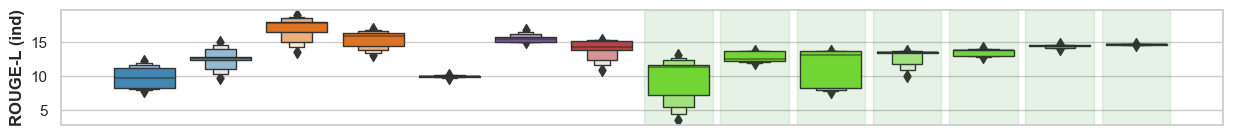

In [354]:
sns.set(rc={'figure.figsize':(15, 1.5)})

sns.set_theme(style="whitegrid", palette=None)

pdf = df.copy()
pdf['model_id'] = pdf['model'].apply(lambda x: model_to_index[x])
pdf['model_name'] = pdf['model'].apply(lambda x: model_to_display_name[x])
pdf = pdf[pdf['dataset'] == 'xl_sum_nusantara_t2t']
pdf = pdf[(~pdf['model'].str.contains('chat')) | (~pdf['model'].str.contains('cendol'))]
pdf = pdf[(~pdf['model'].str.startswith('bloomz-')) & (~pdf['model'].str.startswith('mt0'))]
pdf = pdf[pdf['lang'] == 'ind'].sort_values('model_id')

ax = sns.boxenplot(data=pdf, x='model_name', y='ROUGEL', hue='model', k_depth=3, dodge=False, palette=list(model_to_color.values())[10:])
# ax = sns.boxenplot(pdf, x='model_name', y='ROUGEL', hue='model', k_depth=3, dodge=False, palette=model_to_color.values())
# sns.boxplot(pdf[(pdf['dataset'] == 'xl_sum_nusantara_t2t') & (pdf['lang'] == 'ind')].sort_values('model_id'), x='model', y='ROUGEL', hue='model', dodge=False)
# sns.stripplot(pdf[pdf['lang'] == 'ind'].sort_values('model_id'), x='model', y='weighted_f1_score', hue='model', legend=False, alpha=.8)
# plt.legend(loc='upper left', bbox_to_anchor=(0, 1.15), ncols=6)
n_model = len(pdf["model_name"].unique())
for i in range(n_model-7, n_model):
    ax.axvspan(i-0.45,i+0.45, color='green', alpha=0.1)
    
ax.get_legend().set_visible(False)
plt.xticks(rotation=90)
plt.ylabel('ROUGE-L (ind)', fontdict={'weight': 'bold'})
plt.xlabel(None)
plt.xticks([], [])
plt.savefig('./figures/rougel_xlsum_ind.pdf', bbox_inches='tight')
plt.show()

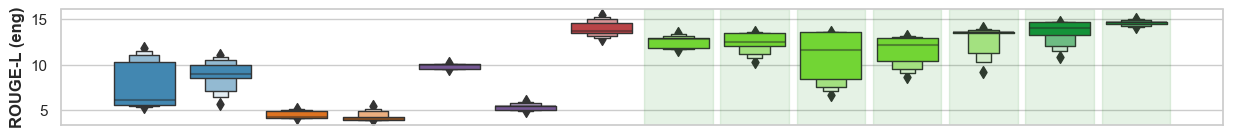

In [355]:
sns.set(rc={'figure.figsize':(15, 1.5)})

sns.set_theme(style="whitegrid", palette=None)

pdf = df.copy()
pdf['model_id'] = pdf['model'].apply(lambda x: model_to_index[x])
pdf['model_name'] = pdf['model'].apply(lambda x: model_to_display_name[x])
pdf = pdf[pdf['dataset'] == 'xl_sum_nusantara_t2t']
pdf = pdf[(~pdf['model'].str.contains('chat')) | (~pdf['model'].str.contains('cendol'))]
pdf = pdf[(~pdf['model'].str.startswith('bloomz-')) & (~pdf['model'].str.startswith('mt0'))]
pdf = pdf[pdf['lang'] == 'eng'].sort_values('model_id')

ax = sns.boxenplot(data=pdf, x='model_name', y='ROUGEL', hue='model', k_depth=3, dodge=False, palette=list(model_to_color.values())[10:])
# sns.boxplot(pdf[(pdf['dataset'] == 'xl_sum_nusantara_t2t') & (pdf['lang'] == 'ind')].sort_values('model_id'), x='model', y='ROUGEL', hue='model', dodge=False)
# sns.stripplot(pdf[pdf['lang'] == 'ind'].sort_values('model_id'), x='model', y='weighted_f1_score', hue='model', legend=False, alpha=.8)
# plt.legend(loc='upper left', bbox_to_anchor=(0, 1.15), ncols=6)
n_model = len(pdf["model_name"].unique())
for i in range(n_model-7, n_model):
    ax.axvspan(i-0.45,i+0.45, color='green', alpha=0.1)
    
ax.get_legend().set_visible(False)
plt.xticks(rotation=90)
plt.ylabel('ROUGE-L (eng)', fontdict={'weight': 'bold'})
plt.xlabel(None)
plt.xticks([], [])
plt.savefig('./figures/rougel_xlsum_eng.pdf', bbox_inches='tight')
plt.show()

In [60]:
df.dataset.unique()

array(['korpus_nusantara_ind_jav_nusantara_t2t',
       'korpus_nusantara_ind_xdy_nusantara_t2t',
       'korpus_nusantara_ind_bug_nusantara_t2t',
       'korpus_nusantara_ind_sun_nusantara_t2t',
       'korpus_nusantara_ind_mad_nusantara_t2t',
       'korpus_nusantara_ind_bjn_nusantara_t2t',
       'korpus_nusantara_ind_tiociu_nusantara_t2t',
       'korpus_nusantara_jav_ind_nusantara_t2t',
       'korpus_nusantara_xdy_ind_nusantara_t2t',
       'korpus_nusantara_bug_ind_nusantara_t2t',
       'korpus_nusantara_sun_ind_nusantara_t2t',
       'korpus_nusantara_mad_ind_nusantara_t2t',
       'korpus_nusantara_bjn_ind_nusantara_t2t',
       'korpus_nusantara_tiociu_ind_nusantara_t2t',
       'stif_indonesia_nusantara_t2t', 'tydiqa_id_nusantara_qa',
       'xl_sum_nusantara_t2t', 'flores200-sun_Latn-ind_Latn',
       'flores200-jav_Latn-ind_Latn', 'flores200-bug_Latn-ind_Latn',
       'flores200-ace_Latn-ind_Latn', 'flores200-bjn_Latn-ind_Latn',
       'flores200-ban_Latn-ind_Latn', 'flor

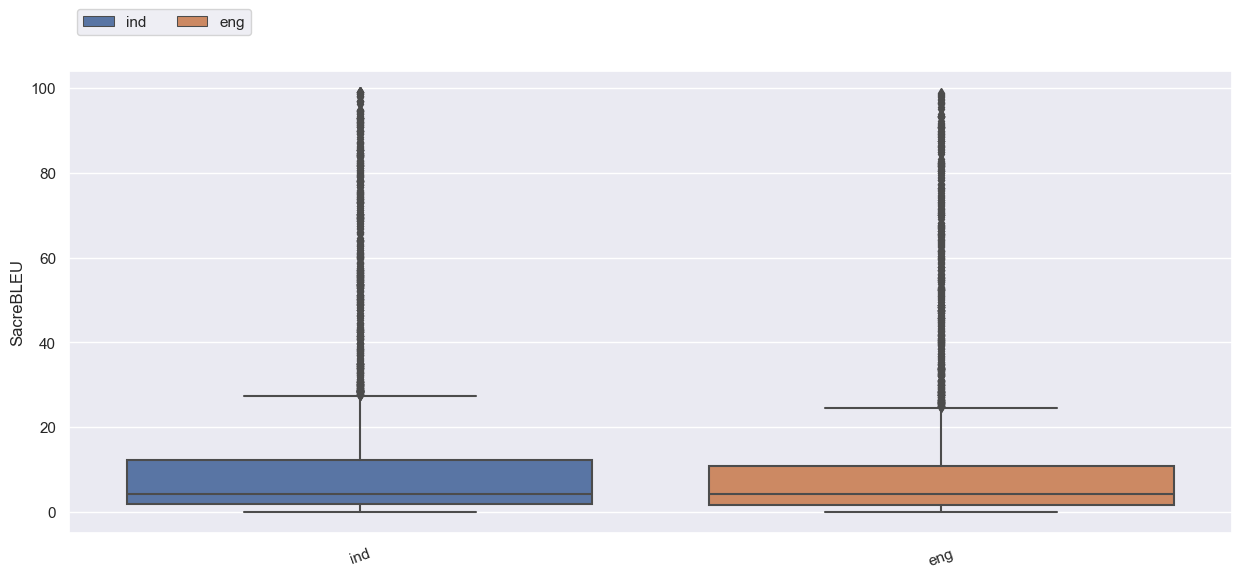

In [61]:
sns.set(rc={'figure.figsize':(15,6)})

pdf = df.copy()
pdf['model_id'] = pdf['model'].apply(lambda x: model_to_index[x])
sns.boxplot(data=pdf.sort_values('model_id'), x='lang', y='SacreBLEU', hue='lang', dodge=False)
# sns.stripplot(pdf[pdf['lang'] == 'eng'].sort_values('model_id'), x='model', y='weighted_f1_score', hue='model', legend=False, alpha=.8)
plt.legend(loc='upper left', bbox_to_anchor=(0, 1.15), ncols=6)
plt.xticks(rotation=20)
plt.ylabel('SacreBLEU')
plt.xlabel(None)
plt.savefig('./figures/sacrebleu_lang.pdf', bbox_inches='tight')
plt.show()

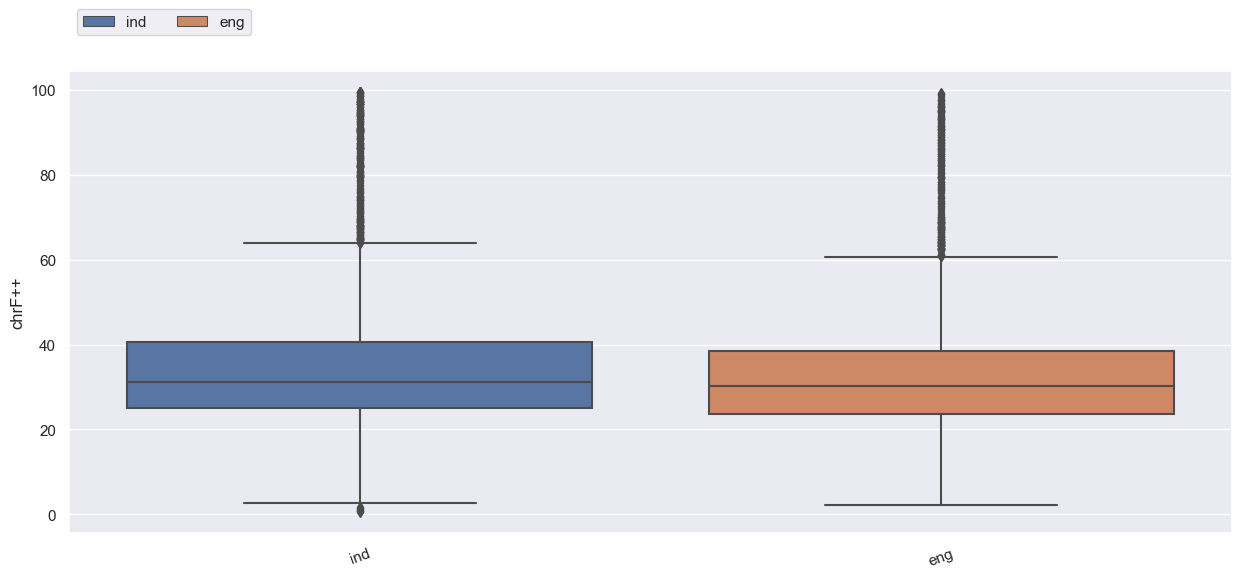

In [63]:
sns.set(rc={'figure.figsize':(15,6)})

pdf = df.copy()
pdf['model_id'] = pdf['model'].apply(lambda x: model_to_index[x])
sns.boxplot(data=pdf.sort_values('model_id'), x='lang', y='chrF++', hue='lang', dodge=False)
# sns.stripplot(pdf[pdf['lang'] == 'eng'].sort_values('model_id'), x='model', y='weighted_f1_score', hue='model', legend=False, alpha=.8)
plt.legend(loc='upper left', bbox_to_anchor=(0, 1.15), ncols=6)
plt.xticks(rotation=20)
plt.ylabel('chrF++')
plt.xlabel(None)
plt.savefig('./figures/chrf_lang.pdf', bbox_inches='tight')
plt.show()

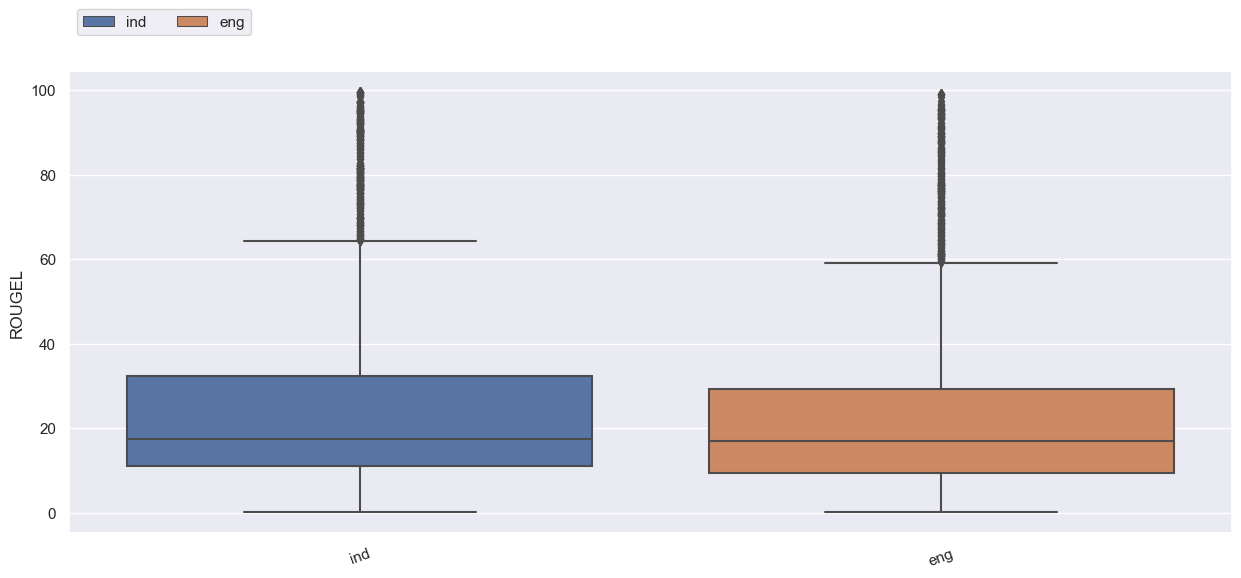

In [64]:
sns.set(rc={'figure.figsize':(15,6)})

pdf = df.copy()
pdf['model_id'] = pdf['model'].apply(lambda x: model_to_index[x])
sns.boxplot(data=pdf.sort_values('model_id'), x='lang', y='ROUGEL', hue='lang', dodge=False)
# sns.stripplot(pdf[pdf['lang'] == 'eng'].sort_values('model_id'), x='model', y='weighted_f1_score', hue='model', legend=False, alpha=.8)
plt.legend(loc='upper left', bbox_to_anchor=(0, 1.15), ncols=6)
plt.xticks(rotation=20)
plt.ylabel('ROUGEL')
plt.xlabel(None)
plt.savefig('./figures/rougel_lang.pdf', bbox_inches='tight')
plt.show()